In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Custom rc definitions
rc = {
        'axes.spines.right': True,
        'axes.spines.top': True,
        'font.family': ['sans-serif'],
        'font.sans-serif':
        # 'Arial',
        'DejaVu Sans',
        # 'Liberation Sans',
        # 'Bitstream Vera Sans',
        # 'sans-serif',
        "xtick.bottom":True,
        'axes.edgecolor': 'indigo',
        'xtick.color': 'black',
        'figure.facecolor': "snow",
        'grid.color': 'grey',
        
}


# font definitions
font_label = {'family': 'serif',
        'color':  'darkred',
        'weight': 'semibold',
        'size': 16,
        }

font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }

font_fig = {'family': 'sans',
        'color':  'chocolate',
        # 'weight': 'bold', # doesn't apply to it. Must be specified independently
        # 'fontsize': 30, # doesn't apply to it. Must be specified independently
        }

In [336]:
def plotting_bar(data:pd.DataFrame,x:str,y:str,ordering=None):
    try:
        fig,ax = plt.subplots(1,figsize=(20,10),constrained_layout=True)
        sns.set_theme(style='whitegrid',rc=rc,palette='Set2')
        sns.barplot(data=data,x=x,y=y,order=ordering)

        ax.set_title(f"{y} bar plot",fontdict=font_title)
        ax.set_xlabel(f"{x}",fontdict=font_label)
        ax.set_ylabel(f"{y}",fontdict=font_label)
        
        ax.tick_params(axis='x', rotation=90,labelsize=20)
    except KeyError:
        print(f"The wrong Key was passed\nPlease look are the information below\n")
        data.info(memory_usage='deep')

In [278]:
# a better version taken from my taxi_cab project
def plotting_count(data:pd.DataFrame,x:str,hue:str=None):    
    try:

        fig,ax = plt.subplots(1,figsize=(20,10),constrained_layout=True)
        sns.set_theme(style='whitegrid',rc=rc,palette='Set2')

        ordering = data[x].value_counts()
        sns.countplot(data=data,x=x,hue=hue,
            order=ordering.sort_values().index[::-1], # descending order
        )
        
        ax.set_title(f"{x} count plot",fontdict=font_title)
        ax.set_xlabel(f"{x}",fontdict=font_label)
        ax.set_ylabel(f"Count",fontdict=font_label)

        ax.tick_params(axis='x', rotation=90,labelsize=20)

    except ValueError:
            print(f"The wrong Value was passed\nPlease look are the information below\n")
            data.info(memory_usage='deep')
    except KeyError:
            print(f"The wrong Key was passed\nPlease look are the information below\n")
            data.info(memory_usage='deep')

In [263]:
def plotting_lines(data,x:str,y:str):
    try:
        sns.set_theme(style='whitegrid',palette='husl',rc=rc)
        fig,ax = plt.subplots(figsize=(20,10))
        sns.lineplot(data=data,x=x,y=y)
        ax.set_title(f'Line plot of {x} vs {y}',fontdict=font_title)
        ax.set_xlabel(f'{x}',fontdict=font_label)
        ax.set_ylabel(f'{y}',fontdict=font_label)
    except ValueError:
        print(f"The wrong Key was passed\nPlease look are the information below\n")
        data.info(memory_usage='deep')

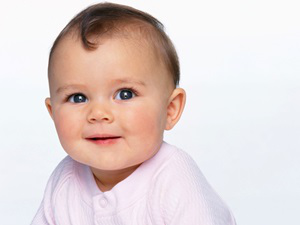

In [6]:
from PIL import Image
img =Image.open("../img/baby1.jfif")
img

## **Loading the data**

In [7]:
names = pd.read_csv("../data/names.csv")
regions = pd.read_csv("../data/regions.csv")

## **Getting to know the data**

### **Names**

In [8]:
names.sample(5,random_state=32)

,State,Gender,Year,Name,Births
470299,PA,F,1984,Christiana,6
1965970,OH,M,2008,Augustine,5
428816,OH,F,1983,Gwendolyn,17
200427,IN,F,1980,Charity,41
1276794,VA,F,1991,Angelina,11


In [9]:
names_cleaning = names.copy()

In [10]:
# checking for null values
names_cleaning.isna().sum()

State     0
Gender    0
Year      0
Name      0
Births    0
dtype: int64

In [11]:
# Checking for duplicates
print(f"How many duplicates: {names_cleaning.duplicated().sum()}")

How many duplicates: 0


In [99]:
print(f"Names shape: {names_cleaning.shape}\n")
print(f"Names dimension: {names_cleaning.ndim}\n")
print(f"Names data types: \n{names_cleaning.dtypes}")
names_cleaning.head()

Names shape: (2212361, 5)

Names dimension: 2

Names data types: 
State     object
Gender    object
Year       int64
Name      object
Births     int64
dtype: object


,State,Gender,Year,Name,Births
0,AK,F,1980,Jessica,116
1,AK,F,1980,Jennifer,114
2,AK,F,1980,Sarah,82
3,AK,F,1980,Amanda,71
4,AK,F,1980,Melissa,65


In [13]:
names_cleaning.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212361 entries, 0 to 2212360
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   State   object
 1   Gender  object
 2   Year    int64 
 3   Name    object
 4   Births  int64 
dtypes: int64(2), object(3)
memory usage: 413.5 MB


In [14]:
names_cleaning.describe(include=np.number) 

,Year,Births
count,2.212361e+06,2.212361e+06
mean,1.995836e+03,4.462692e+01
std,8.644557e+00,1.443715e+02
min,1.980000e+03,5.000000e+00
25%,1.989000e+03,7.000000e+00
50%,1.996000e+03,1.100000e+01
75%,2.003000e+03,2.900000e+01
max,2.009000e+03,8.240000e+03


**Observations**
- Least year is 1980 and max year is 2009
- 25% of the data is below year 1989
- 50% of the data is below year 1996
- 75% of the data is below year 2003
- Mean births is approximatey 45
- Standard deviation is 144, meaning a high spread of the data
- Least birth is 5 and the max birth is 8240
- 25% of the data is below 5 births
- 50% of the data is below 11 births
- 75% of the data is below 29 births

In [15]:
names_cleaning.describe(include=np.object)

,State,Gender,Name
count,2212361,2212361,2212361
unique,51,2,22240
top,CA,F,Jordan
freq,178427,1245104,2935


**Observations**
- CA in the State columnn has the highest frequency of appearance
- Females in the gender column has the highest frequency of appearance
- Jordan in the Name column has the highest frequency of appearance

**What to do**
- Lower case all columns and convert data types


In [16]:
# Memory management
def memory_magment(df):
    for col in df.columns:
        col_type = df[col].dtype

        cond1 = (col_type == np.object ) or (col_type == pd.CategoricalDtype)
        if cond1:
            df[col] = df[col].astype('category')  
        else:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8) # int 8
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16) # int 16
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)  # in 32
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64) # int 64 
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].round(3)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].round(3)
                else:
                    df[col] = df[col].round(3) # float64

    return df

In [17]:
# Data conversion and memory management
names_data_memory = names_cleaning.copy()
names_data_memory = memory_magment(names_data_memory)

In [107]:
names_data_memory.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212361 entries, 0 to 2212360
Data columns (total 5 columns):
 #   Column  Dtype   
---  ------  -----   
 0   State   category
 1   Gender  category
 2   Year    int16   
 3   Name    category
 4   Births  int16   
dtypes: category(3), int16(2)
memory usage: 18.7 MB


In [19]:
# percentage decrease
np.round(((413.5-18.7)/413.5) * 100,1)

95.5

Memory usage has dropped from 413.5 MB to 18.7 MB i.e. **95.5% decrease in memory usage**

In [20]:
names_featured = names_data_memory.copy()
names_featured.sample(5,random_state=32)

,State,Gender,Year,Name,Births
470299,PA,F,1984,Christiana,6
1965970,OH,M,2008,Augustine,5
428816,OH,F,1983,Gwendolyn,17
200427,IN,F,1980,Charity,41
1276794,VA,F,1991,Angelina,11


In [386]:
print(f"Names shape: {names_featured.shape}\n")
print(f"Names dimension: {names_featured.ndim}\n")
print(f"Names data types: \n{names_featured.dtypes}")
names_featured.head()

Names shape: (2212361, 5)

Names dimension: 2

Names data types: 
state     category
gender    category
year         int16
name      category
births       int16
dtype: object


,state,gender,year,name,births
0,AK,F,1980,Jessica,116
1,AK,F,1980,Jennifer,114
2,AK,F,1980,Sarah,82
3,AK,F,1980,Amanda,71
4,AK,F,1980,Melissa,65


In [21]:
names_featured.columns = names_featured.columns.str.lower()
names_featured.columns

Index(['state', 'gender', 'year', 'name', 'births'], dtype='object')

In [114]:
cat_columns = names_featured.select_dtypes(include=pd.CategoricalDtype)
cat_columns
for column in cat_columns:
    list_length = len(names_featured[column].unique().tolist())
    if list_length > 10:
        print(f"Too many values, will only print the total values present in the {column} column")
        print(f"This is the total values present in the {column} column:\n{names_featured[column].nunique()}\n")
    else:
        print(f"These are the values in the {column} column:\n{names_featured[column].unique().tolist()}\n")
        print(f"This is the total values present in the: {column} column:\n{names_featured[column].nunique()}\n")

Too many values, will only print the total values present in the state column
This is the total values present in the state column:
51

These are the values in the gender column:
['F', 'M']

This is the total values present in the: gender column:
2

Too many values, will only print the total values present in the name column
This is the total values present in the name column:
22240



In [23]:
names_featured.sample(5,random_state=32)

,state,gender,year,name,births
470299,PA,F,1984,Christiana,6
1965970,OH,M,2008,Augustine,5
428816,OH,F,1983,Gwendolyn,17
200427,IN,F,1980,Charity,41
1276794,VA,F,1991,Angelina,11


**For EDA**
- Check which state has the highest births
- Check with year has the highest births
- Check which name appears the most
- Check which gender appears the most
- Check which gender appears the most in each state

**Suggested chart(s):** *Bar Chart, Count chart, Histogram, Boxplot*

In [24]:
# Sorting by years
names_featured.sort_values(by='year',ascending=False).head()

,state,gender,year,name,births
2212360,WY,M,2009,Xavier,5
1550751,GA,F,2009,Kelli,5
1550738,GA,F,2009,Kandace,5
1550739,GA,F,2009,Kanijah,5
1550740,GA,F,2009,Kaori,5


In [25]:
# Sorting by name
names_featured.sort_values(by='name',ascending=False).head()

,state,gender,year,name,births
800402,GA,M,1998,Zyshonne,5
2096314,TX,F,2008,Zyriah,10
2092990,TX,F,2007,Zyriah,8
1547219,GA,F,2007,Zyriah,5
2090018,TX,F,2006,Zyriah,6


In [26]:
# Sorting by state
names_featured.sort_values(by='state',ascending=False).head()

,state,gender,year,name,births
2212360,WY,M,2009,Xavier,5
609384,WY,F,1986,Melanie,7
609404,WY,F,1986,Rebekah,6
609403,WY,F,1986,Pamela,6
609402,WY,F,1986,Meagan,6


In [27]:
def summary_stats(data,group:str,column):
    try:
        col_type = data[column].dtype
        cond = (str(col_type)[:3] == 'int') | (str(col_type)[:3] == 'flo')
        if cond:
            group_data = (
                data.groupby(group)[column].agg(
                    [
                        (f"total_{column}",'sum'),
                        (f'average_{column}','mean'),
                        (f'deviation_{column}','std'),
                        (f"skewness_level_{column}","skew")
                    ]
                ).round(3)
                .reset_index()
            )
            return group_data
        else:
            group_data = (
                data.groupby(group)[column].agg(
                    [
                        (f"count_total_{column}",'count')
                    ]
                ).reset_index()
            )
            return group_data
    except (KeyError):
        print(f"This is the list of keys: {data.columns}")

**Grouping by state**

In [633]:
group_data = summary_stats(names_featured,'state','births')
# sorting by total
group_data.sort_values(by='total_births',ascending=False).head()

,state,total_births,average_births,deviation_births,skewness_level_births
4,CA,14076348.0,78.891,296.409,9.595
43,TX,9078670.0,66.340,212.548,8.329
34,NY,6689160.0,56.202,202.115,10.492
9,FL,4768528.0,51.372,152.591,7.858
14,IL,4597638.0,52.045,153.678,8.064


In [29]:
# Sorting by average
group_data.sort_values(by='average_births',ascending=False).head()

,state,total_births,average_births,deviation_births,skewness_level_births
4,CA,14076348.0,78.891,296.409,9.595
43,TX,9078670.0,66.340,212.548,8.329
38,PA,4032694.0,57.890,175.448,7.746
35,OH,4101121.0,57.787,174.136,7.453
34,NY,6689160.0,56.202,202.115,10.492


In [612]:
# Sorting by deviation_births
group_data.sort_values(by='deviation_births',ascending=False).head()

,state,total_births,average_births,deviation_births,skewness_level_births
4,CA,14076348.0,78.891,296.409,9.595
43,TX,9078670.0,66.340,212.548,8.329
34,NY,6689160.0,56.202,202.115,10.492
38,PA,4032694.0,57.890,175.448,7.746
35,OH,4101121.0,57.787,174.136,7.453


**Grouping by year**

In [613]:
group_data = summary_stats(names_featured,'year','births')
# sorting by total
group_data.sort_values(by='total_births',ascending=False).head()

,year,total_births,average_births,deviation_births,skewness_level_births
10,1990,3566753.0,51.584,179.173,13.122
11,1991,3502904.0,50.220,171.144,12.891
9,1989,3475391.0,51.849,179.321,12.713
12,1992,3442429.0,48.564,161.979,12.448
27,2007,3413961.0,36.175,103.758,11.809


In [31]:
# Sorting by average
group_data.sort_values(by='average_births',ascending=False).head()

,year,total_births,average_births,deviation_births,skewness_level_births
3,1983,3153566.0,54.011,181.531,12.055
4,1984,3176691.0,53.901,181.957,12.136
5,1985,3246156.0,53.609,182.718,12.169
2,1982,3192940.0,53.317,178.453,12.046
1,1981,3146074.0,52.978,175.175,11.728


In [614]:
# Sorting by deviation_births
group_data.sort_values(by='deviation_births',ascending=False).head()

,year,total_births,average_births,deviation_births,skewness_level_births
5,1985,3246156.0,53.609,182.718,12.169
4,1984,3176691.0,53.901,181.957,12.136
7,1987,3266349.0,52.562,181.909,12.710
3,1983,3153566.0,54.011,181.531,12.055
6,1986,3228063.0,52.746,180.545,12.321


**Grouping by name**

In [34]:
group_data = summary_stats(names_featured,'name','name')
# sorting by count
group_data.sort_values(by='count_total_name',ascending=False).head()

,name,count_total_name
10188,Jordan,2935
20075,Taylor,2826
3642,Casey,2771
15119,Morgan,2741
8963,Jamie,2574


In [36]:
group_data = summary_stats(names_featured,'gender','gender')
# sorting by count
group_data.sort_values(by='count_total_gender',ascending=False).head()

,gender,count_total_gender
0,F,1245104
1,M,967257


In [91]:
group_data = (
    names_featured.groupby(["state","gender"])['gender'].agg(
        [
            (f"count_total_gender",'count')
        ]
    )
)

group_data.reset_index().sort_values(by="count_total_gender",ascending=False).head()

,state,gender,count_total_gender
8,CA,F,106200
86,TX,F,81214
9,CA,M,72227
68,NY,F,68117
87,TX,M,55636


In [93]:
# group_data = (
#     names_featured.groupby(["state","name"])['name'].agg(
#         [
#             (f"count_total_name",'count')
#         ]
#     )
# )  # Too many values

### **Region**

In [94]:
regions.sample(5,random_state=32)

,State,Region
49,WY,Mountain
16,KS,Midwest
41,TN,South
35,OK,South
44,VT,New_England


In [96]:
regions_cleaning = regions.copy()

In [97]:
# checking for null values
regions_cleaning.isna().sum()

State     0
Region    0
dtype: int64

In [98]:
# Checking for duplicates
print(f"How many duplicates: {regions_cleaning.duplicated().sum()}")

How many duplicates: 0


In [100]:
print(f"Regions shape: {regions_cleaning.shape}\n")
print(f"Regions dimension: {regions_cleaning.ndim}\n")
print(f"Regions data types: \n{regions_cleaning.dtypes}")
regions_cleaning.head()

Regions shape: (50, 2)

Regions dimension: 2

Regions data types: 
State     object
Region    object
dtype: object


,State,Region
0,AL,South
1,AK,Pacific
2,AZ,Mountain
3,AR,South
4,CA,Pacific


In [101]:
regions_cleaning.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   50 non-null     object
 1   Region  50 non-null     object
dtypes: object(2)
memory usage: 6.2 KB


In [102]:
regions_cleaning.describe(include=np.object)

,State,Region
count,50,50
unique,50,7
top,TN,South
freq,1,16


**Observations**
- 50 unique states and 7 unique regions, with **South** being the most frequent appearing 16 times.
- Convert to category, no numerical values detected.
- map state abbreviations to full names.

In [104]:
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}
len(us_state_abbrev) # 50 states


50

In [106]:
# Data conversion and memory management
regions_data_memory = regions_cleaning.copy()
regions_data_memory = memory_magment(regions_data_memory)

In [108]:
regions_data_memory.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   State   50 non-null     category
 1   Region  50 non-null     category
dtypes: category(2)
memory usage: 5.9 KB


In [109]:
# percentage decrease
np.round(((6.2-5.9)/6.2) * 100,1)

4.8

Memory usage has dropped from 6.2 KB to 5.9 KB i.e. **4.8% decrease in memory usage**

In [110]:
regions_featured = regions_data_memory.copy()
regions_featured.sample(5,random_state=32)

,State,Region
49,WY,Mountain
16,KS,Midwest
41,TN,South
35,OK,South
44,VT,New_England


In [111]:
regions_featured.columns = regions_featured.columns.str.lower()
regions_featured.columns

Index(['state', 'region'], dtype='object')

In [113]:
cat_columns = regions_featured.select_dtypes(include=pd.CategoricalDtype)
cat_columns
for column in cat_columns:
    list_length = len(regions_featured[column].unique().tolist())
    if list_length > 10:
        print(f"Too many values, will only print the total values present in the {column} column")
        print(f"This is the total values present in the {column} column:\n{regions_featured[column].nunique()}\n")
    else:
        print(f"These are the values in the {column} column:\n{regions_featured[column].unique().tolist()}\n")
        print(f"This is the total values present in the: {column} column:\n{regions_featured[column].nunique()}\n")

Too many values, will only print the total values present in the state column
This is the total values present in the state column:
50

These are the values in the region column:
['South', 'Pacific', 'Mountain', 'New_England', 'Mid_Atlantic', 'Midwest', 'New England']

This is the total values present in the: region column:
7



In [123]:
us_state_abbrevs = {}
for k,v in us_state_abbrev.items():
    keys,values = v,k
    us_state_abbrevs[keys] = values
# us_state_abbrevs

In [126]:
regions_featured['state_full_names'] = regions_featured.state.map(us_state_abbrevs)
regions_featured.sample(5,random_state=32)

,state,region,state_full_names
49,WY,Mountain,Wyoming
16,KS,Midwest,Kansas
41,TN,South,Tennessee
35,OK,South,Oklahoma
44,VT,New_England,Vermont


In [127]:
regions_featured.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             50 non-null     category
 1   region            50 non-null     category
 2   state_full_names  49 non-null     object  
dtypes: category(2), object(1)
memory usage: 9.1 KB


In [140]:
regions_featured.at[7,'state_full_names'] = "District of Columbia"
regions_featured.at[7,'state_full_names']

'District of Columbia'

In [141]:
regions_featured.state_full_names = regions_featured.state_full_names.astype("category")
regions_featured.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             50 non-null     category
 1   region            50 non-null     category
 2   state_full_names  50 non-null     category
dtypes: category(3)
memory usage: 11.2 KB


In [142]:
# percentage increase
np.round(((11.2-5.9)/5.9) * 100,1)

89.8

Memory usage has increased from 5.9 KB to 11.2 KB i.e. **89.8% increase in memory usage**

In [145]:
group_data = summary_stats(regions_featured,"region",'region')
group_data.sort_values('count_total_region',ascending=False)

,region,count_total_region
6,South,16
1,Midwest,11
2,Mountain,8
4,New_England,5
5,Pacific,5
0,Mid_Atlantic,4
3,New England,1


In [155]:
group_data = (
    regions_featured.groupby(["region","state"])['region'].agg(
        [
            (f"count_total_region",'count')
        ]
    )
)

group_data.head()

count_total_region
region       state                    
Mid_Atlantic AK                      0
             AL                      0
             AR                      0
             AZ                      0
             CA                      0

In [158]:
# Working with MultiIndex DataFrames
# Access all Mid_Atlantic
group_data.loc[('Mid_Atlantic',"AK")]

count_total_region    0
Name: (Mid_Atlantic, AK), dtype: int64

In [166]:
category_level = group_data.index.get_level_values('region')
print(category_level.to_list()[:5])


['Mid_Atlantic', 'Mid_Atlantic', 'Mid_Atlantic', 'Mid_Atlantic', 'Mid_Atlantic']


In [169]:
# Access all rows where 'Category' is 'Mid_AtlanticMid_Atlantic'
group_data.xs('Mid_Atlantic', level='region')[:5]


,count_total_region
state,
AK,0
AL,0
AR,0
AZ,0
CA,0


### **Merged Data**

**USE POWERBI TO CONFIRM EVERYTHING AFTER MERGING**

In [450]:
full_merged = pd.merge(names_featured,regions_featured,on=['state'],how='inner')
full_merged.sample(5,random_state=32)

,state,gender,year,name,births,region,state_full_names
861204,LA,M,1989,Angelo,7,South,Louisiana
950767,MD,F,1992,Brittany,522,South,Maryland
1950887,UT,F,2003,Cora,6,Mountain,Utah
88038,AZ,F,1987,Tina,24,Mountain,Arizona
455623,FL,M,1990,Payton,8,South,Florida


In [451]:
full_merged_cleaning = full_merged.copy()

In [452]:
print(f"full_merged shape: {full_merged_cleaning.shape}\n")
print(f"full_merged dimension: {full_merged_cleaning.ndim}\n")
print(f"full_merged data types: \n{full_merged_cleaning.dtypes}")
full_merged_cleaning.head()

full_merged shape: (2144561, 7)

full_merged dimension: 2

full_merged data types: 
state                 object
gender              category
year                   int16
name                category
births                 int16
region              category
state_full_names    category
dtype: object


,state,gender,year,name,births,region,state_full_names
0,AK,F,1980,Jessica,116,Pacific,Alaska
1,AK,F,1980,Jennifer,114,Pacific,Alaska
2,AK,F,1980,Sarah,82,Pacific,Alaska
3,AK,F,1980,Amanda,71,Pacific,Alaska
4,AK,F,1980,Melissa,65,Pacific,Alaska


In [448]:
# Checking for duplicates
print(f"How many duplicates: {full_merged_cleaning.duplicated().sum()}")

How many duplicates: 0


In [449]:
# checking for null values
full_merged_cleaning.isna().sum()

state                   0
gender                  0
year                    0
name                    0
births                  0
region              67800
state_full_names    67800
dtype: int64

In [393]:
# Confirmation table
group_data = (
    full_merged_cleaning.groupby(["name"])['name'].agg(
        [
            (f"count_total_name",'count')
        ]
    ).reset_index()
)

group_data.sort_values('count_total_name',ascending=False).tail()

,name,count_total_name
12429,Lakyra,0
18784,Shawntez,0
17098,Reda,0
18785,Shawntia,0
525,Ajanee,0


In [394]:
full_merged_cleaning.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144561 entries, 0 to 2144560
Data columns (total 7 columns):
 #   Column            Dtype   
---  ------            -----   
 0   state             object  
 1   gender            category
 2   year              int16   
 3   name              category
 4   births            int16   
 5   region            category
 6   state_full_names  category
dtypes: category(4), int16(2), object(1)
memory usage: 221.8 MB


In [395]:
full_merged_cleaning.state = full_merged_cleaning.state.astype("category")

In [396]:
full_merged_cleaning.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144561 entries, 0 to 2144560
Data columns (total 7 columns):
 #   Column            Dtype   
---  ------            -----   
 0   state             category
 1   gender            category
 2   year              int16   
 3   name              category
 4   births            int16   
 5   region            category
 6   state_full_names  category
dtypes: category(5), int16(2)
memory usage: 103.2 MB


In [398]:
full_merged_cleaning.sample(5,random_state=32)

,state,gender,year,name,births,region,state_full_names
861204,LA,M,1989,Angelo,7,South,Louisiana
950767,MD,F,1992,Brittany,522,South,Maryland
1950887,UT,F,2003,Cora,6,Mountain,Utah
88038,AZ,F,1987,Tina,24,Mountain,Arizona
455623,FL,M,1990,Payton,8,South,Florida


In [399]:
new_order = ["name",'gender','year','births','state_full_names','region','state']

full_merged_cleaning = full_merged_cleaning[new_order]
full_merged_cleaning.drop(columns=['state'],inplace=True)
columns_to_rename = {"state_full_names":"state"}
full_merged_cleaning.rename(columns=columns_to_rename,inplace=True)
full_merged_cleaning.sample(5,random_state=32)

,name,gender,year,births,state,region
861204,Angelo,M,1989,7,Louisiana,South
950767,Brittany,F,1992,522,Maryland,South
1950887,Cora,F,2003,6,Utah,Mountain
88038,Tina,F,1987,24,Arizona,Mountain
455623,Payton,M,1990,8,Florida,South


In [400]:
full_merged_cleaning.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144561 entries, 0 to 2144560
Data columns (total 6 columns):
 #   Column  Dtype   
---  ------  -----   
 0   name    category
 1   gender  category
 2   year    int16   
 3   births  int16   
 4   state   category
 5   region  category
dtypes: category(4), int16(2)
memory usage: 101.1 MB


In [402]:
full_merged_featured = full_merged_cleaning.copy()

In [403]:
group_data = summary_stats(full_merged_featured,'region','region')
group_data.sort_values(by='count_total_region',ascending=False)

,region,count_total_region
6,South,798502
1,Midwest,441464
5,Pacific,294260
0,Mid_Atlantic,267785
2,Mountain,221741
4,New_England,107402
3,New England,13407


Replace New England with New_England

In [404]:
full_merged_featured.region.replace('New England',"New_England",inplace=True)
group_data = summary_stats(full_merged_featured,'region','region')
group_data.sort_values(by='count_total_region',ascending=False)

,region,count_total_region
5,South,798502
1,Midwest,441464
4,Pacific,294260
0,Mid_Atlantic,267785
2,Mountain,221741
3,New_England,120809


In [615]:
group_data = summary_stats(full_merged_featured,'region','births')
group_data.head()

,region,total_births,average_births,deviation_births,skewness_level_births
0,Mid_Atlantic,13742667.0,51.320,172.783,10.309
1,Midwest,19245081.0,43.594,119.335,8.737
2,Mountain,6282217.0,28.331,53.341,5.759
3,New_England,4269213.0,35.339,84.245,8.086
4,Pacific,17540716.0,59.610,235.353,11.894


In [616]:
# Sort by total_births
group_data.sort_values(by='total_births',ascending=False)

,region,total_births,average_births,deviation_births,skewness_level_births
5,South,34219920.0,42.855,124.950,10.447
1,Midwest,19245081.0,43.594,119.335,8.737
4,Pacific,17540716.0,59.610,235.353,11.894
0,Mid_Atlantic,13742667.0,51.320,172.783,10.309
2,Mountain,6282217.0,28.331,53.341,5.759
3,New_England,4269213.0,35.339,84.245,8.086


In [407]:
# Sort by average_births
group_data.sort_values(by='average_births',ascending=False)

,region,total_births,average_births,deviation_births,skewness_level_births
4,Pacific,17540716.0,59.610,235.353,11.894
0,Mid_Atlantic,13742667.0,51.320,172.783,10.309
1,Midwest,19245081.0,43.594,119.335,8.737
5,South,34219920.0,42.855,124.950,10.447
3,New_England,4269213.0,35.339,84.245,8.086
2,Mountain,6282217.0,28.331,53.341,5.759


In [617]:
# Sort by deviation_births
group_data.sort_values(by='deviation_births',ascending=False)

,region,total_births,average_births,deviation_births,skewness_level_births
4,Pacific,17540716.0,59.610,235.353,11.894
0,Mid_Atlantic,13742667.0,51.320,172.783,10.309
5,South,34219920.0,42.855,124.950,10.447
1,Midwest,19245081.0,43.594,119.335,8.737
3,New_England,4269213.0,35.339,84.245,8.086
2,Mountain,6282217.0,28.331,53.341,5.759


In [408]:
group_data = summary_stats(full_merged_featured,'region','gender')
group_data.head()

,region,count_total_gender
0,Mid_Atlantic,267785
1,Midwest,441464
2,Mountain,221741
3,New_England,120809
4,Pacific,294260


In [409]:
# Sort by count_total_gender
group_data.sort_values(by='count_total_gender',ascending=False)

,region,count_total_gender
5,South,798502
1,Midwest,441464
4,Pacific,294260
0,Mid_Atlantic,267785
2,Mountain,221741
3,New_England,120809


In [410]:
group_data = (
    full_merged_featured.groupby(["year",'region'])['region'].agg(
        [
            (f"count_total_region",'count')
        ]
    )
)

group_data

count_total_region
year region                          
1980 Mid_Atlantic                7302
     Midwest                    12575
     Mountain                    5828
     New_England                 3305
     Pacific                     7620
...                               ...
2009 Midwest                    19019
     Mountain                    9978
     New_England                 4627
     Pacific                    11944
     South                      35607

[180 rows x 1 columns]

In [623]:
group_data = (
    full_merged_featured.groupby(["year",'region'])['births'].agg(
        [
            (f"total_births",'sum'),
            (f'average_births','mean'),
            (f'deviation_births','std'),
            (f"skewness_level_births","skew")
        ]
    ).round(3)
    # .reset_index()
)

group_data

total_births  average_births  deviation_births  \
year region                                                         
1980 Mid_Atlantic      451335.0          61.810           219.114   
     Midwest           716397.0          56.970           169.418   
     Mountain          183394.0          31.468            63.179   
     New_England       138911.0          42.031           103.130   
     Pacific           479483.0          62.924           247.009   
...                         ...             ...               ...   
2009 Midwest           580464.0          30.520            63.166   
     Mountain          237687.0          23.821            39.187   
     New_England       113598.0          24.551            44.297   
     Pacific           576901.0          48.300           168.280   
     South            1224826.0          34.398            90.113   

                   skewness_level_births  
year region                               
1980 Mid_Atlantic                  9.964  
     Midwest                       8.188  
     Mountain                      5.733  
     New_England                   7.610  
     Pacific                      12.281  
...                                  ...  
2009 Midwest                       5.943  
     Mountain                      4.854  
     New_England                   5.369  
     Pacific                       9.916  
     South                         9.485  

[180 rows x 4 columns]

In [620]:
group_data.reset_index().sort_values('total_births',ascending=False)

,year,region,total_births,average_births,deviation_births,skewness_level_births
167,2007,South,1283094.0,36.171,96.913,9.379
161,2006,South,1263140.0,36.810,98.566,9.291
173,2008,South,1259584.0,35.302,93.241,9.323
179,2009,South,1224826.0,34.398,90.113,9.485
155,2005,South,1219000.0,37.062,99.364,9.427
...,...,...,...,...,...,...
153,2005,New_England,124781.0,27.430,53.355,5.585
159,2006,New_England,123555.0,26.440,50.421,5.489
165,2007,New_England,122296.0,25.982,49.350,5.527
171,2008,New_England,118178.0,25.112,46.479,5.471


In [621]:
group_data.reset_index().sort_values('average_births',ascending=False)

,year,region,total_births,average_births,deviation_births,skewness_level_births
64,1990,Pacific,676577.0,68.135,291.195,12.380
70,1991,Pacific,672334.0,67.748,283.230,11.914
34,1985,Pacific,539147.0,66.619,277.594,12.400
58,1989,Pacific,631332.0,66.582,284.249,12.438
46,1987,Pacific,565239.0,66.460,282.895,12.746
...,...,...,...,...,...,...
164,2007,Mountain,256882.0,25.701,44.521,5.126
171,2008,New_England,118178.0,25.112,46.479,5.471
170,2008,Mountain,251249.0,24.950,41.867,4.886
177,2009,New_England,113598.0,24.551,44.297,5.369


In [622]:
group_data.reset_index().sort_values('deviation_births',ascending=False)

,year,region,total_births,average_births,deviation_births,skewness_level_births
64,1990,Pacific,676577.0,68.135,291.195,12.380
58,1989,Pacific,631332.0,66.582,284.249,12.438
52,1988,Pacific,594220.0,66.349,283.351,12.520
70,1991,Pacific,672334.0,67.748,283.230,11.914
46,1987,Pacific,565239.0,66.460,282.895,12.746
...,...,...,...,...,...,...
152,2005,Mountain,244184.0,26.231,45.167,5.015
164,2007,Mountain,256882.0,25.701,44.521,5.126
177,2009,New_England,113598.0,24.551,44.297,5.369
170,2008,Mountain,251249.0,24.950,41.867,4.886


In [412]:
category_level = group_data.index.get_level_values('year')
print(set(category_level.to_list()))

{1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009}


In [624]:
group_data.xs(1980,level='year')

,total_births,average_births,deviation_births,skewness_level_births
region,,,,
Mid_Atlantic,451335.0,61.810,219.114,9.964
Midwest,716397.0,56.970,169.418,8.188
Mountain,183394.0,31.468,63.179,5.733
New_England,138911.0,42.031,103.130,7.610
Pacific,479483.0,62.924,247.009,12.281
South,1033473.0,49.043,143.945,10.318


In [625]:
group_data.xs(1980,level='year') # verifying 1980 for Mid_Atlantic below

,total_births,average_births,deviation_births,skewness_level_births
region,,,,
Mid_Atlantic,451335.0,61.810,219.114,9.964
Midwest,716397.0,56.970,169.418,8.188
Mountain,183394.0,31.468,63.179,5.733
New_England,138911.0,42.031,103.130,7.610
Pacific,479483.0,62.924,247.009,12.281
South,1033473.0,49.043,143.945,10.318


In [415]:
group_data.xs('Mid_Atlantic',level='region').head()

,total_births,average_births,deviation_births,skewness_level_births
year,,,,
1980,451335.0,61.810,219.114,9.964
1981,454984.0,62.878,224.018,9.996
1982,462275.0,63.178,226.091,9.891
1983,459423.0,64.399,229.956,9.728
1984,461507.0,63.770,227.409,9.694


In [626]:
group_data = (
    full_merged_featured.groupby(["gender",'region'])['region'].agg(
        [
            (f"count_total_gender",'count')
        ]
    )
)

group_data

count_total_gender
gender region                          
F      Mid_Atlantic              151879
       Midwest                   248632
       Mountain                  121880
       New_England                67596
       Pacific                   169783
       South                     446513
M      Mid_Atlantic              115906
       Midwest                   192832
       Mountain                   99861
       New_England                53213
       Pacific                   124477
       South                     351989

In [417]:
group_data.reset_index().sort_values(by='count_total_gender',ascending=False)

,gender,region,count_total_gender
5,F,South,446513
11,M,South,351989
1,F,Midwest,248632
7,M,Midwest,192832
4,F,Pacific,169783
0,F,Mid_Atlantic,151879
10,M,Pacific,124477
2,F,Mountain,121880
6,M,Mid_Atlantic,115906
8,M,Mountain,99861


### **Visualisations**

In [455]:
full_merged_featured.dropna(axis=1,inplace=True)
full_merged.shape

(2144561, 7)

In [456]:
full_merged_eda = full_merged_featured.copy()

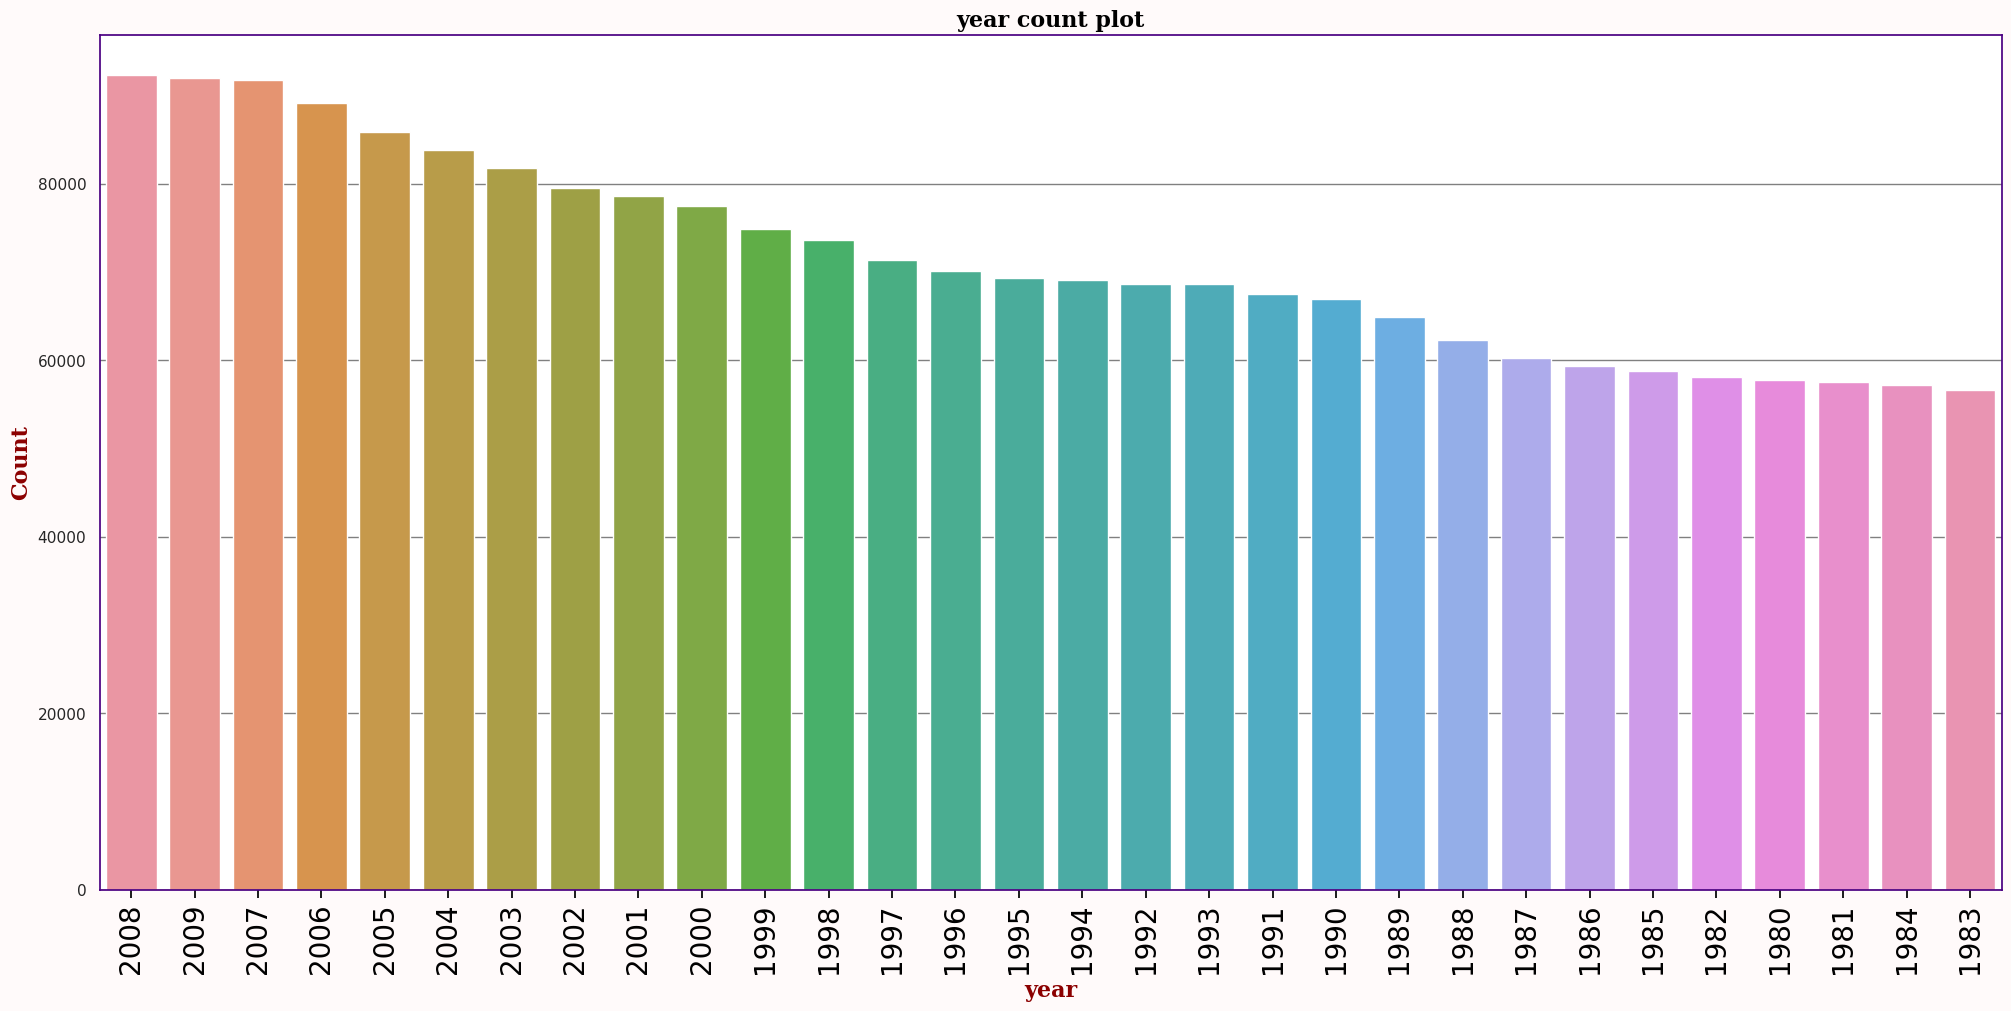

In [457]:
plotting_count(full_merged_eda,'year')

In [458]:
# Confirmation table
group_data = (
    full_merged_eda.groupby(["year"])['year'].agg(
        [
            (f"count_total_year",'count')
        ]
    ).reset_index()
)

group_data.sort_values('count_total_year',ascending=False).head()

,year,count_total_year
28,2008,92264
29,2009,91915
27,2007,91699
26,2006,89138
25,2005,85880


In [498]:
# Confirmation table
group_data = summary_stats(full_merged_eda,'year','births')
group_data.head()

,year,total_births,average_births,deviation_births,skewness_level_births
0,1980,3002993.0,52.042,170.439,11.846
1,1981,3021808.0,52.526,174.065,11.983
2,1982,3070439.0,52.861,177.496,12.304
3,1983,3035786.0,53.589,180.781,12.297
4,1984,3056651.0,53.492,181.293,12.383


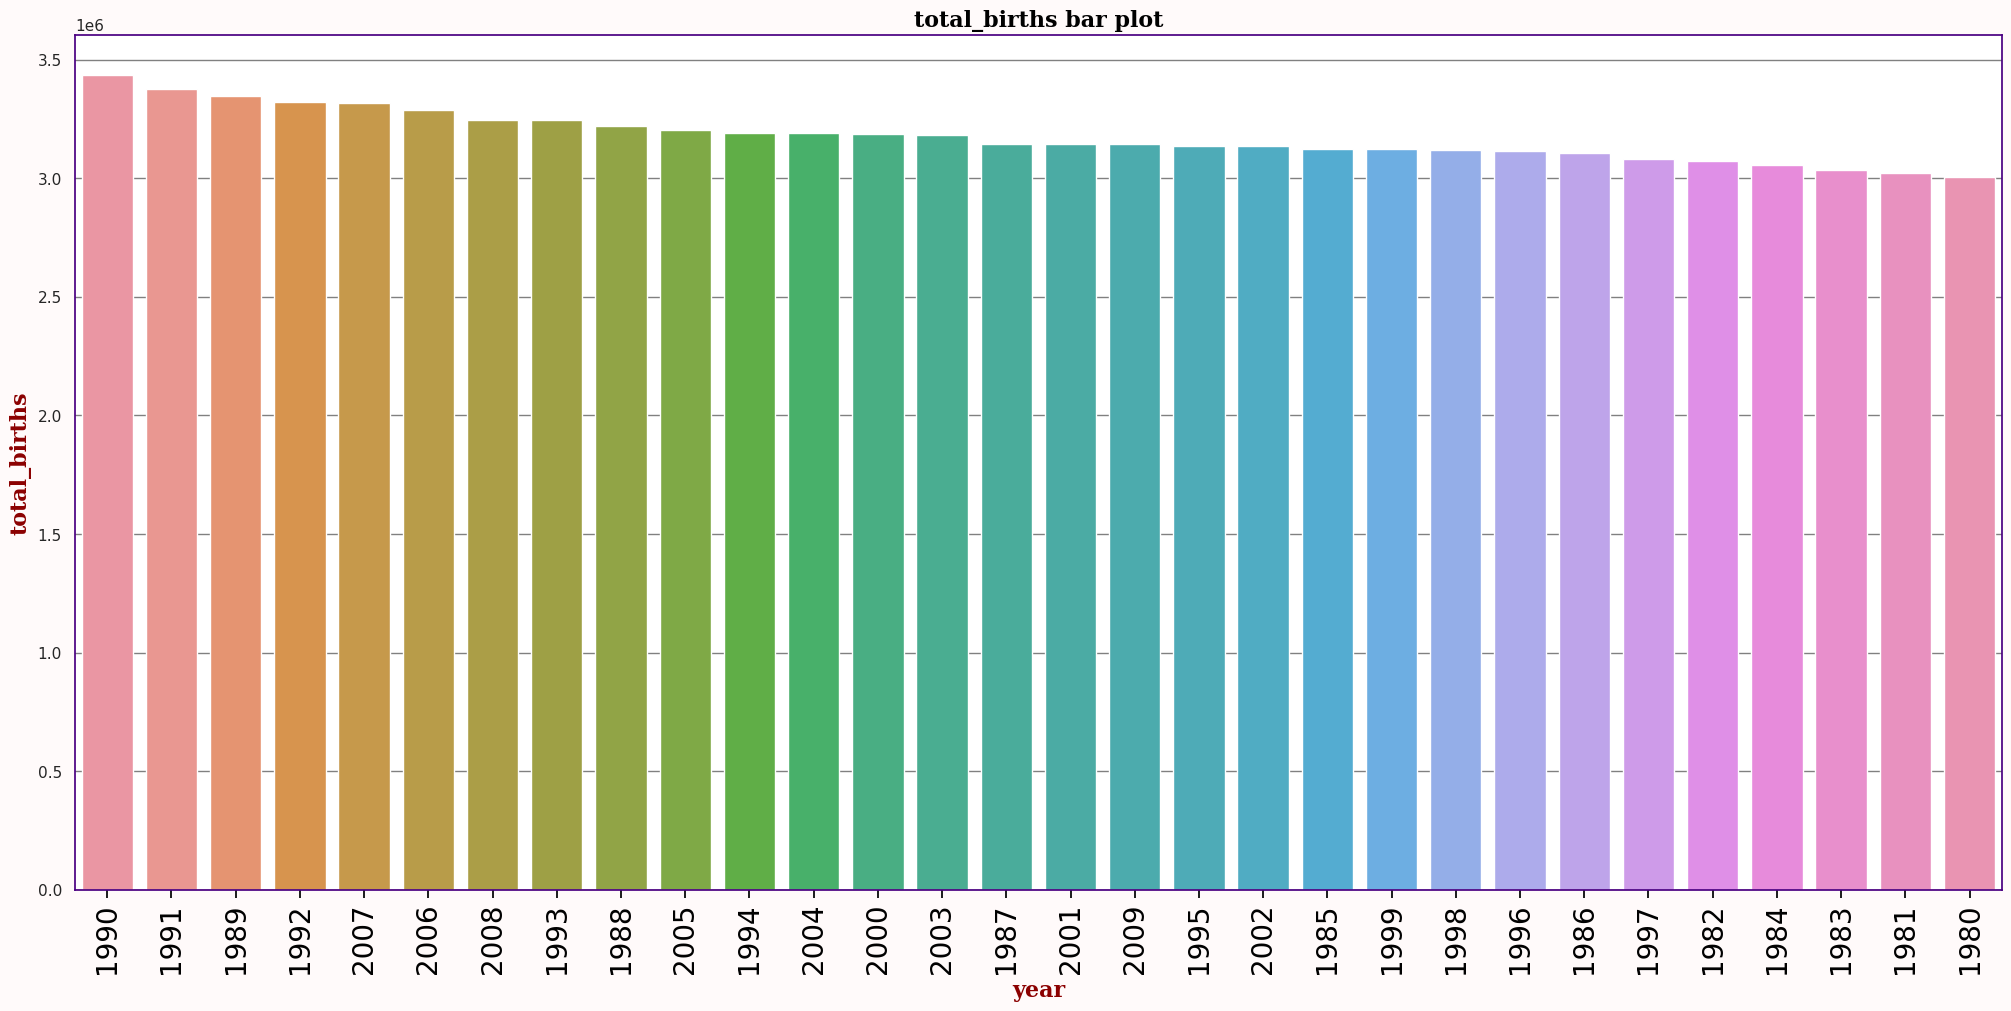

In [503]:
ordering = group_data.sort_values('total_births',ascending=False).year
plotting_bar(group_data,'year','total_births',ordering=ordering)

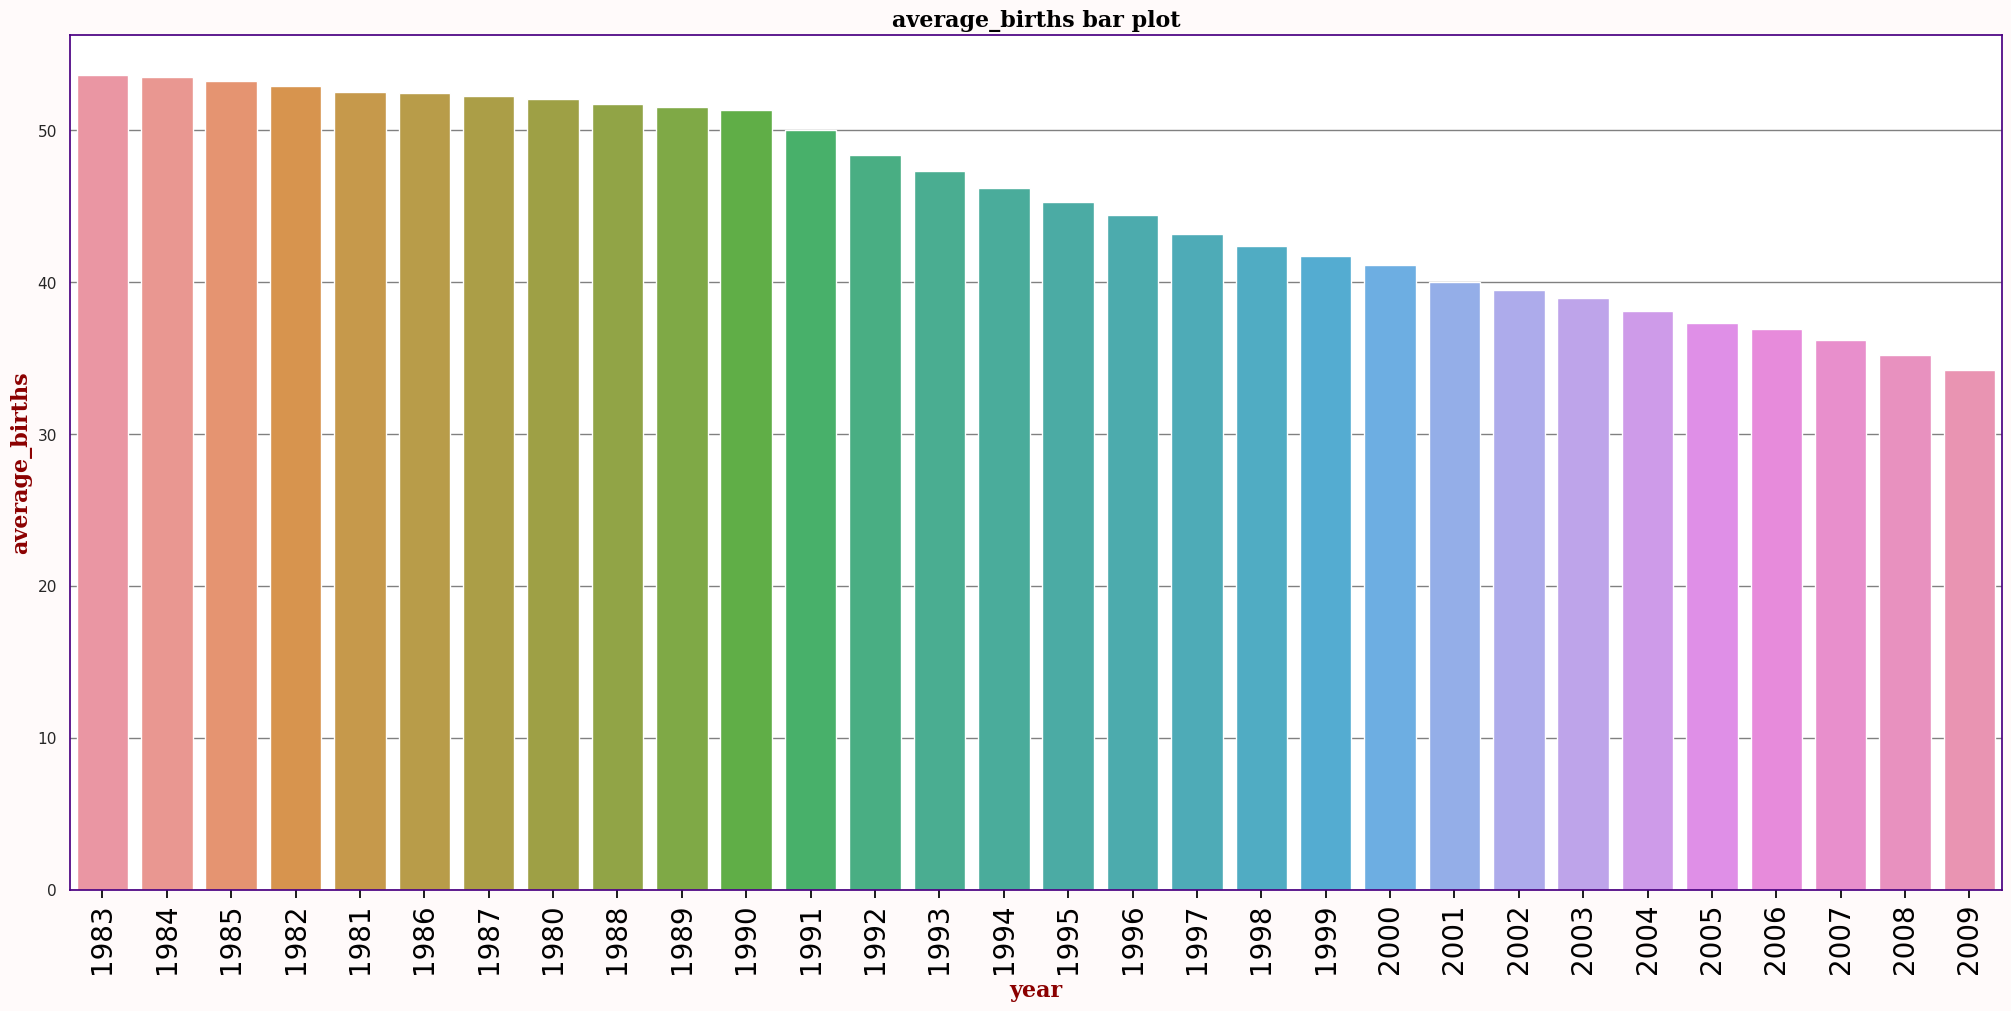

In [504]:
ordering = group_data.sort_values('average_births',ascending=False).year
plotting_bar(group_data,'year','average_births',ordering=ordering)

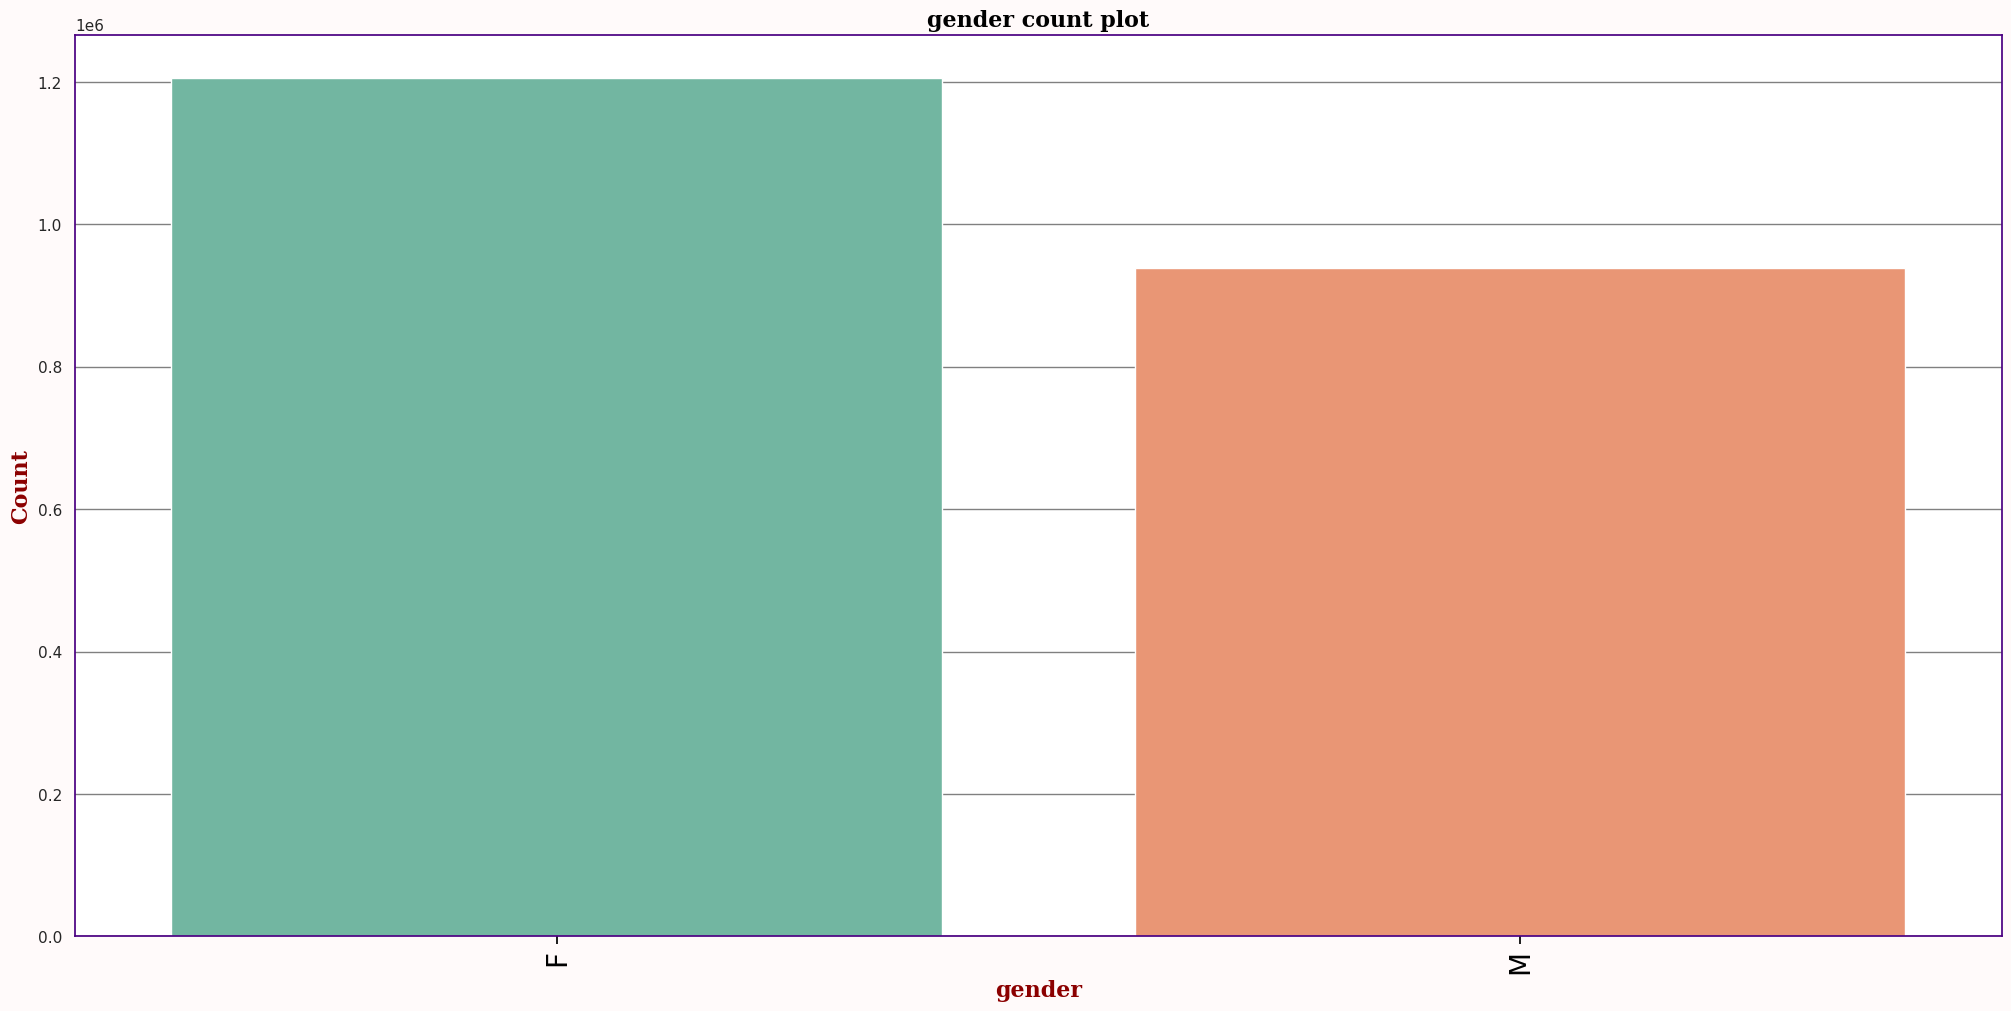

In [459]:
plotting_count(full_merged_eda,'gender')

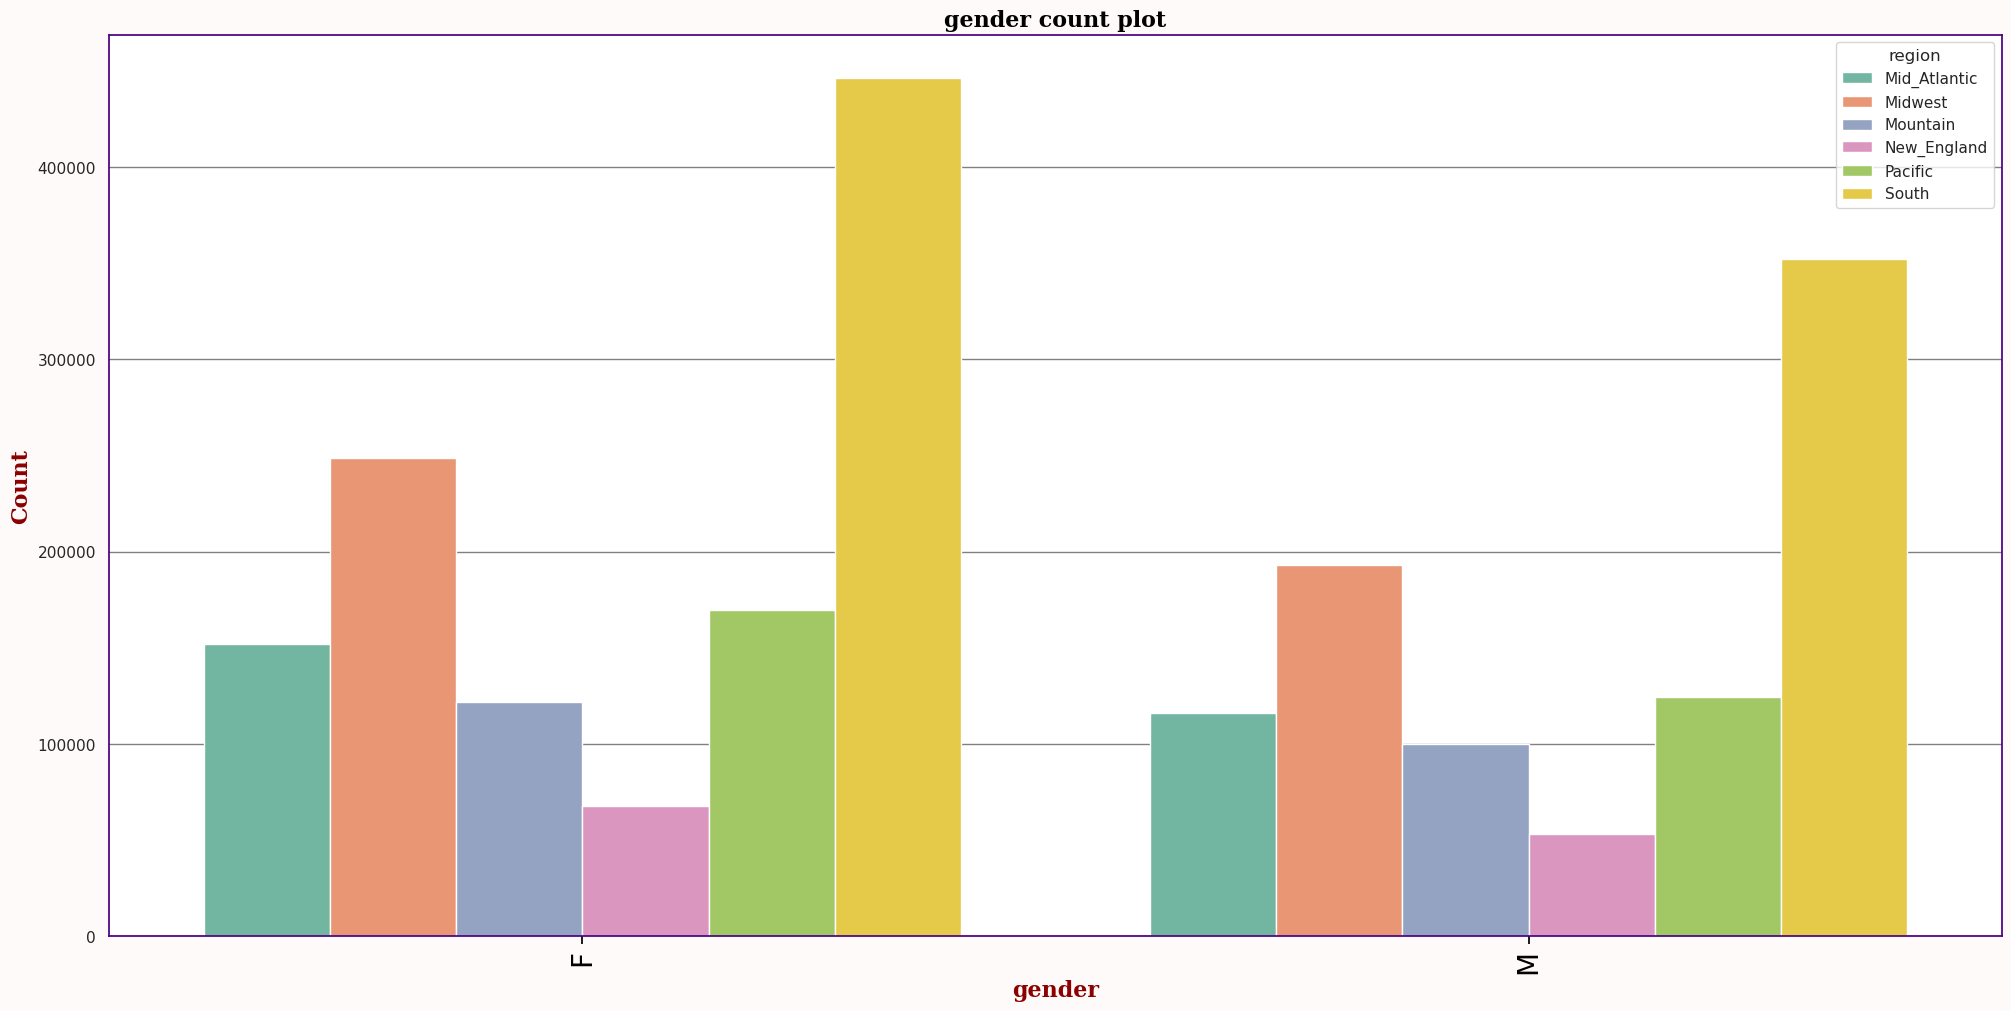

In [479]:
plotting_count(full_merged_eda,'gender',hue="region")

In [627]:
group_data = summary_stats(full_merged_eda,'gender','births')
group_data.head()

,gender,total_births,average_births,deviation_births,skewness_level_births
0,F,44255684.0,36.688,110.801,13.442
1,M,51044130.0,54.402,177.947,11.661


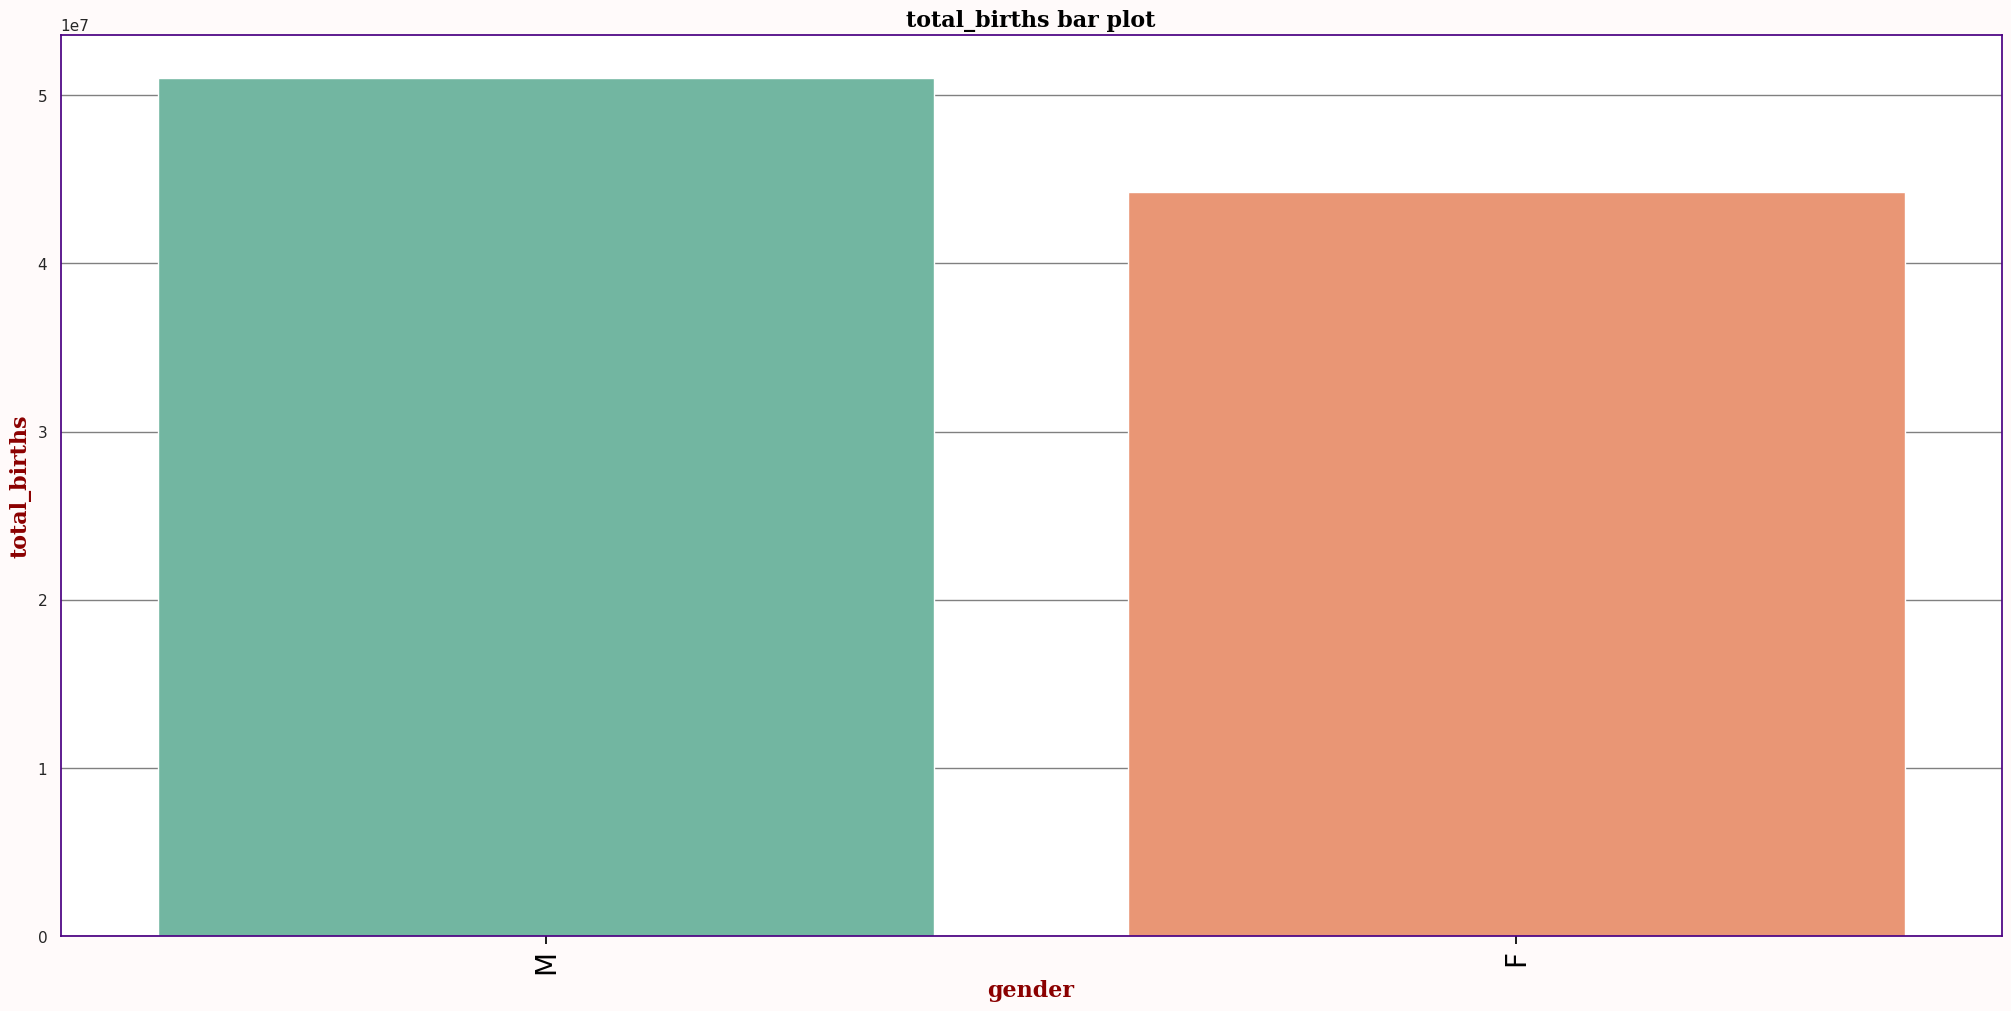

In [628]:
ordering = group_data.sort_values('total_births',ascending=False).gender
plotting_bar(group_data,'gender','total_births',ordering=ordering)

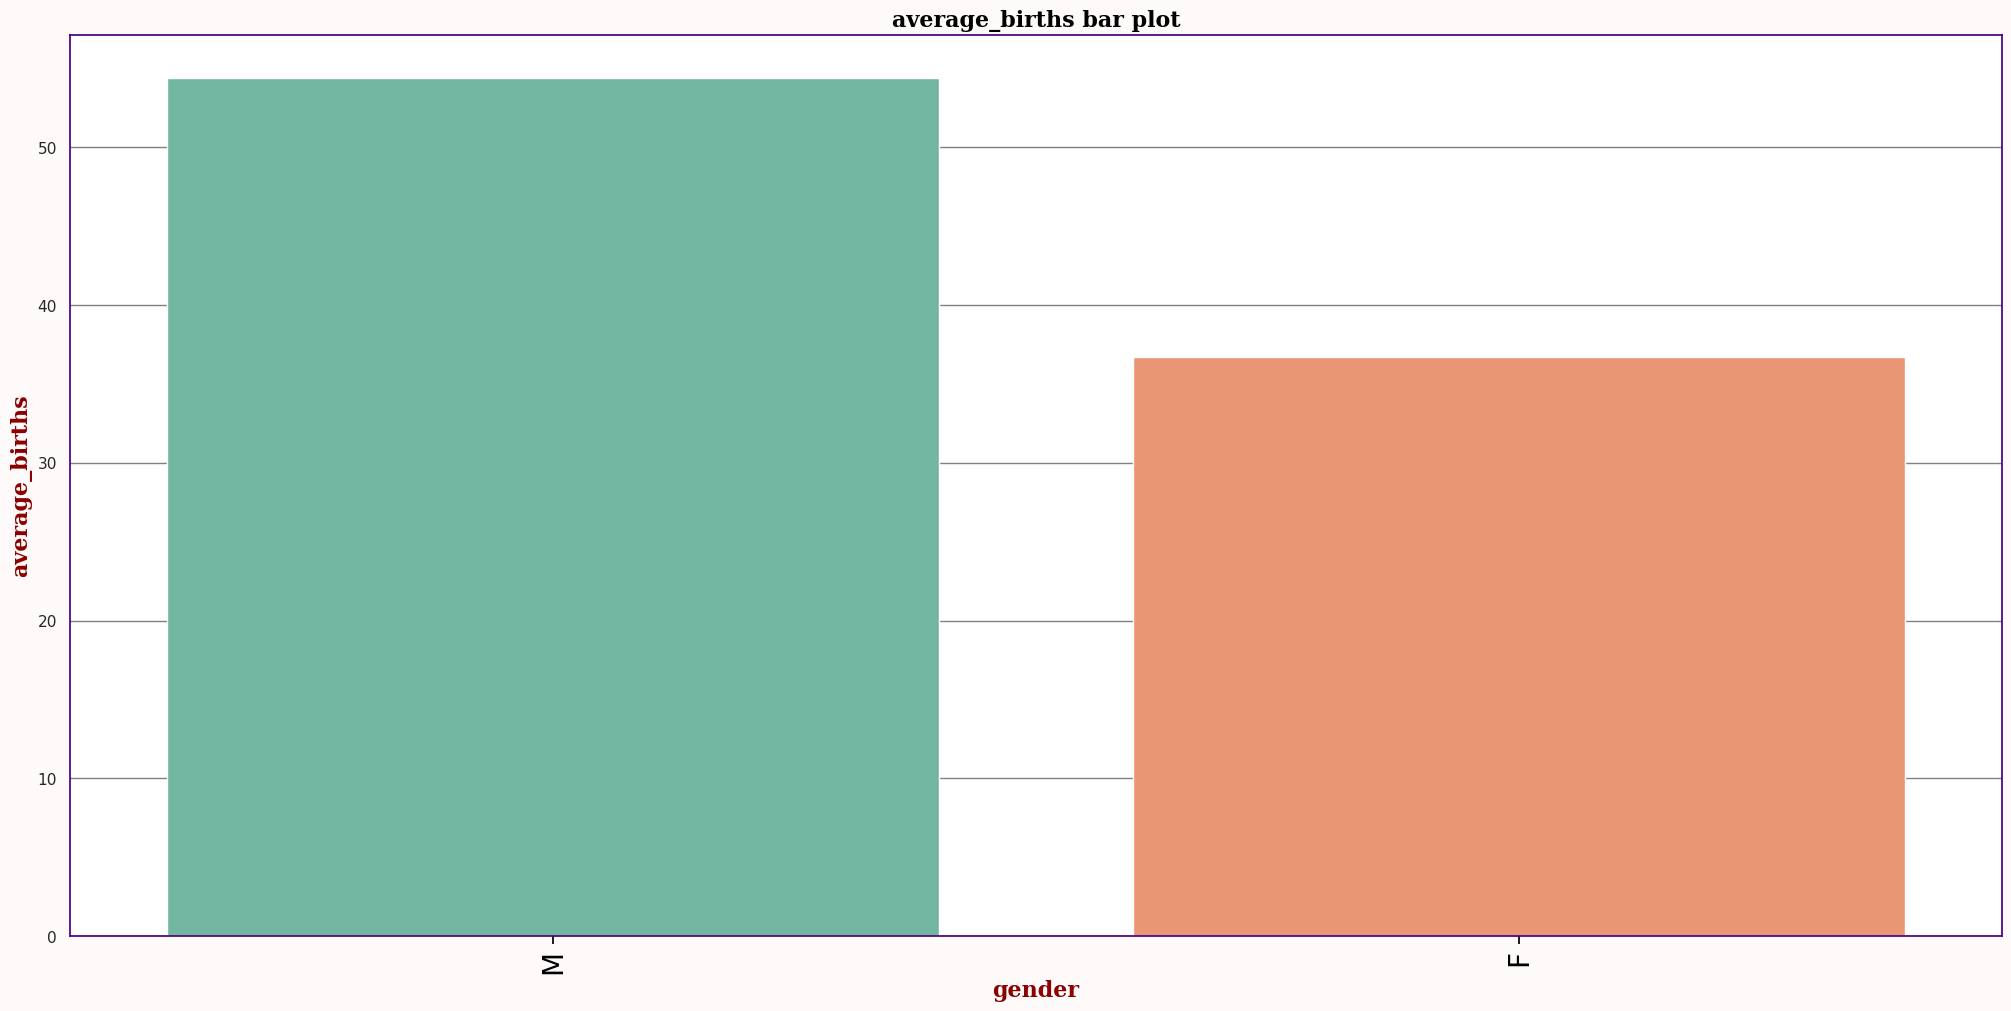

In [ ]:
ordering = group_data.sort_values('average_births',ascending=False).gender
plotting_bar(group_data,'gender','average_births',ordering=ordering)

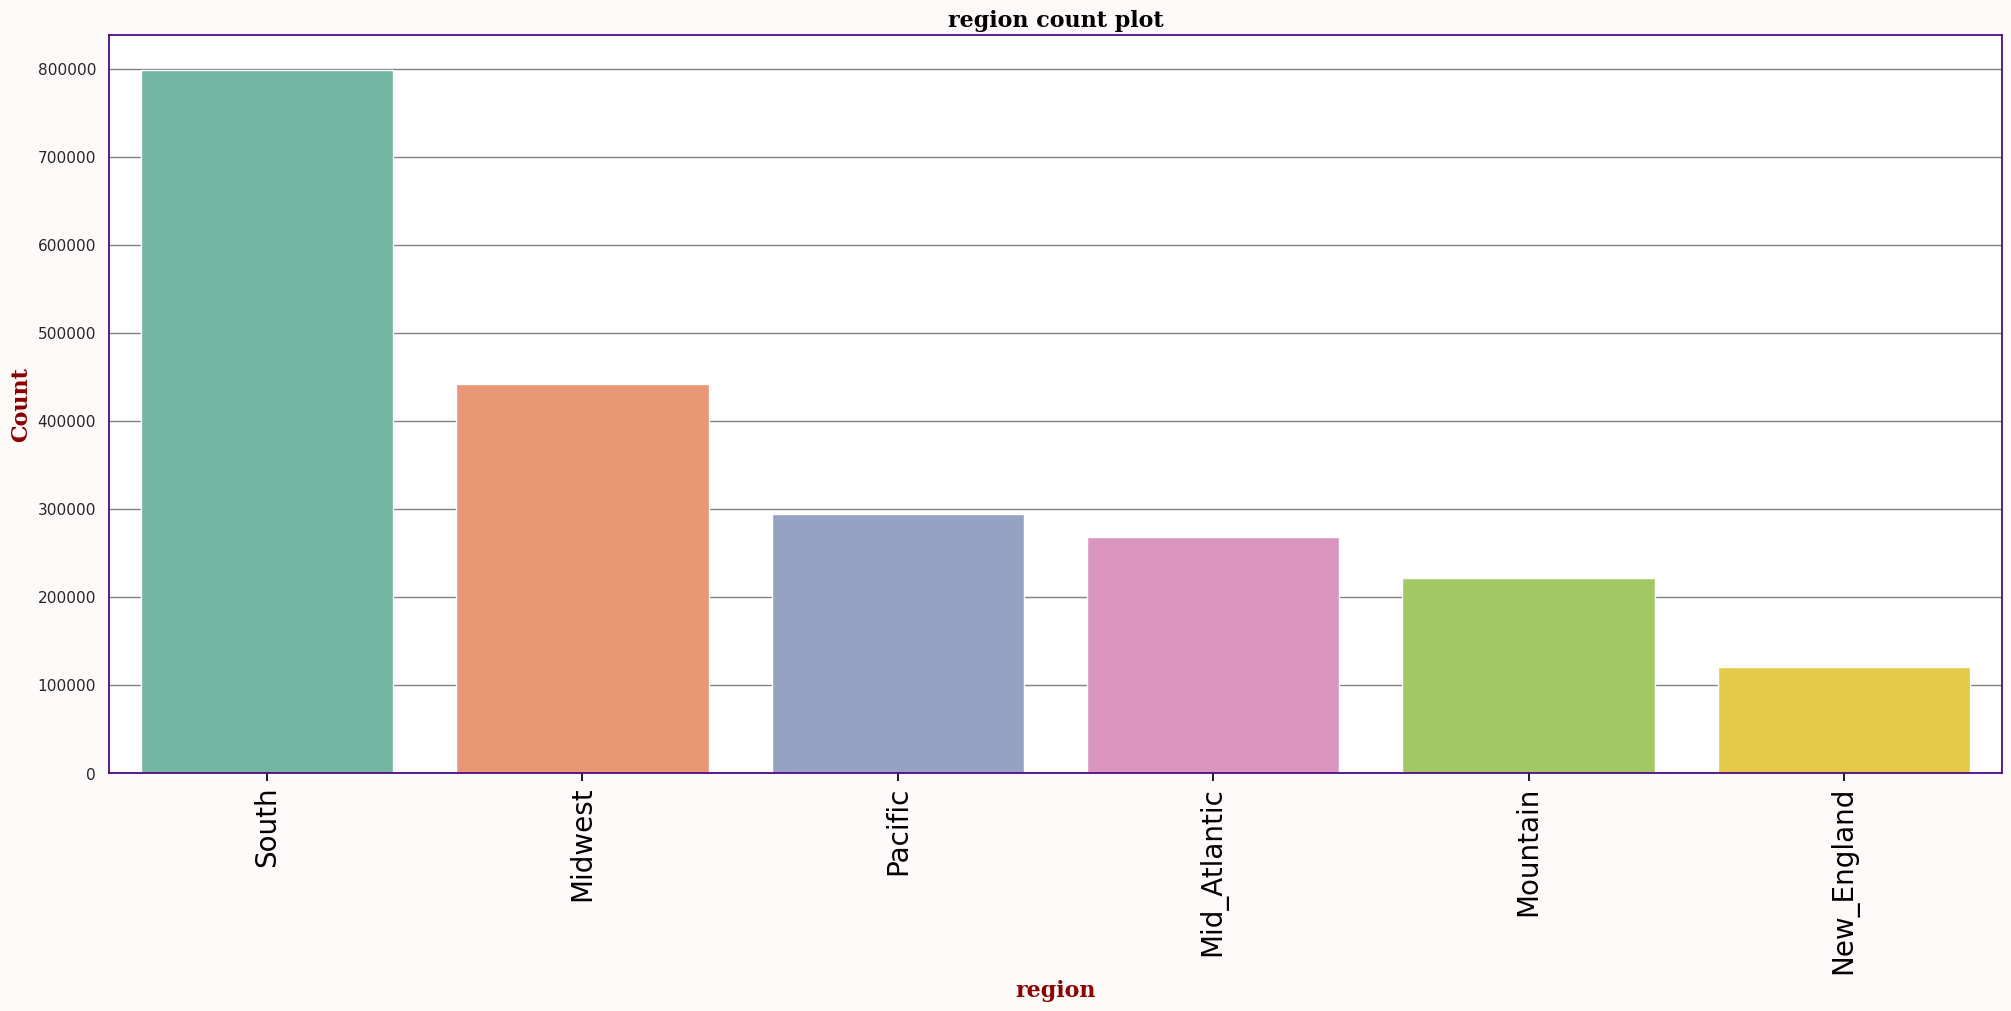

In [460]:
plotting_count(full_merged_eda,'region')

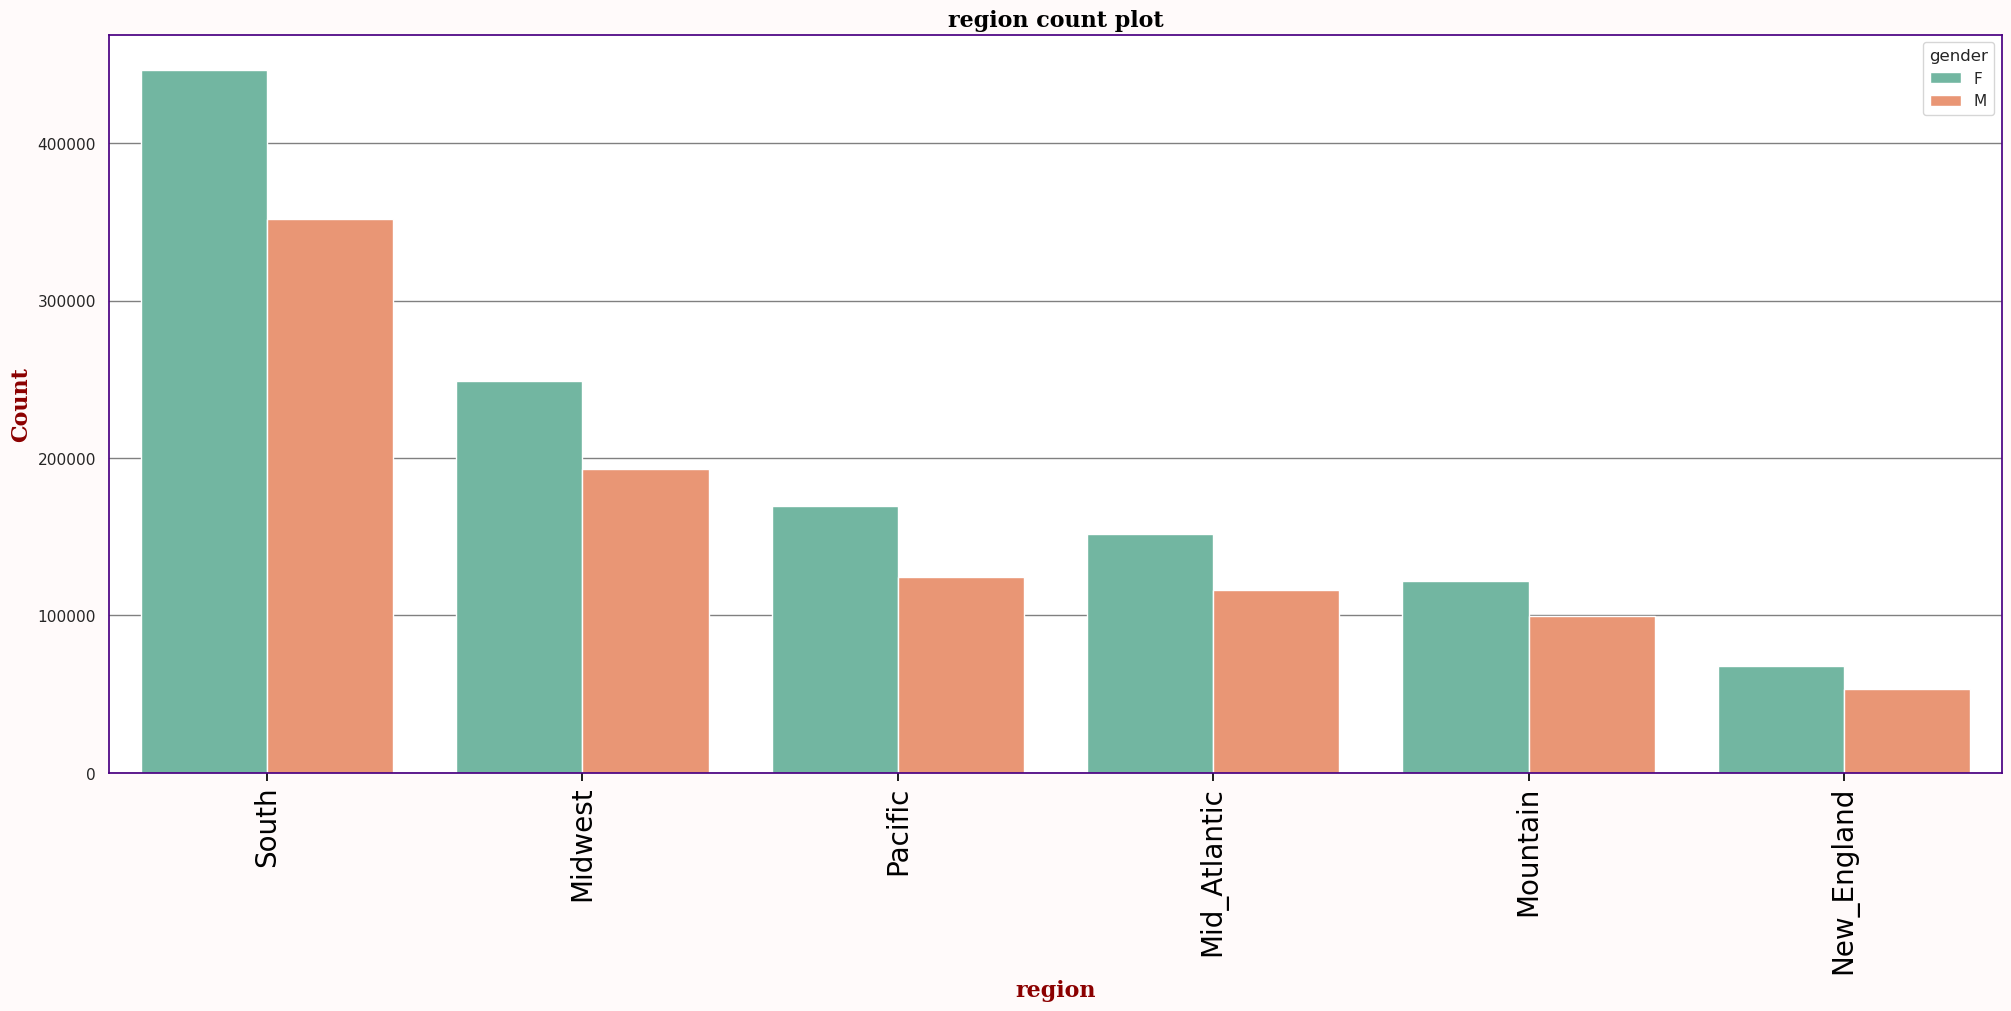

In [481]:
plotting_count(full_merged_eda,'region','gender')

In [636]:
group_data = summary_stats(full_merged_eda,'region','births')
group_data

,region,total_births,average_births,deviation_births,skewness_level_births
0,Mid_Atlantic,13742667.0,51.320,172.783,10.309
1,Midwest,19245081.0,43.594,119.335,8.737
2,Mountain,6282217.0,28.331,53.341,5.759
3,New_England,4269213.0,35.339,84.245,8.086
4,Pacific,17540716.0,59.610,235.353,11.894
5,South,34219920.0,42.855,124.950,10.447


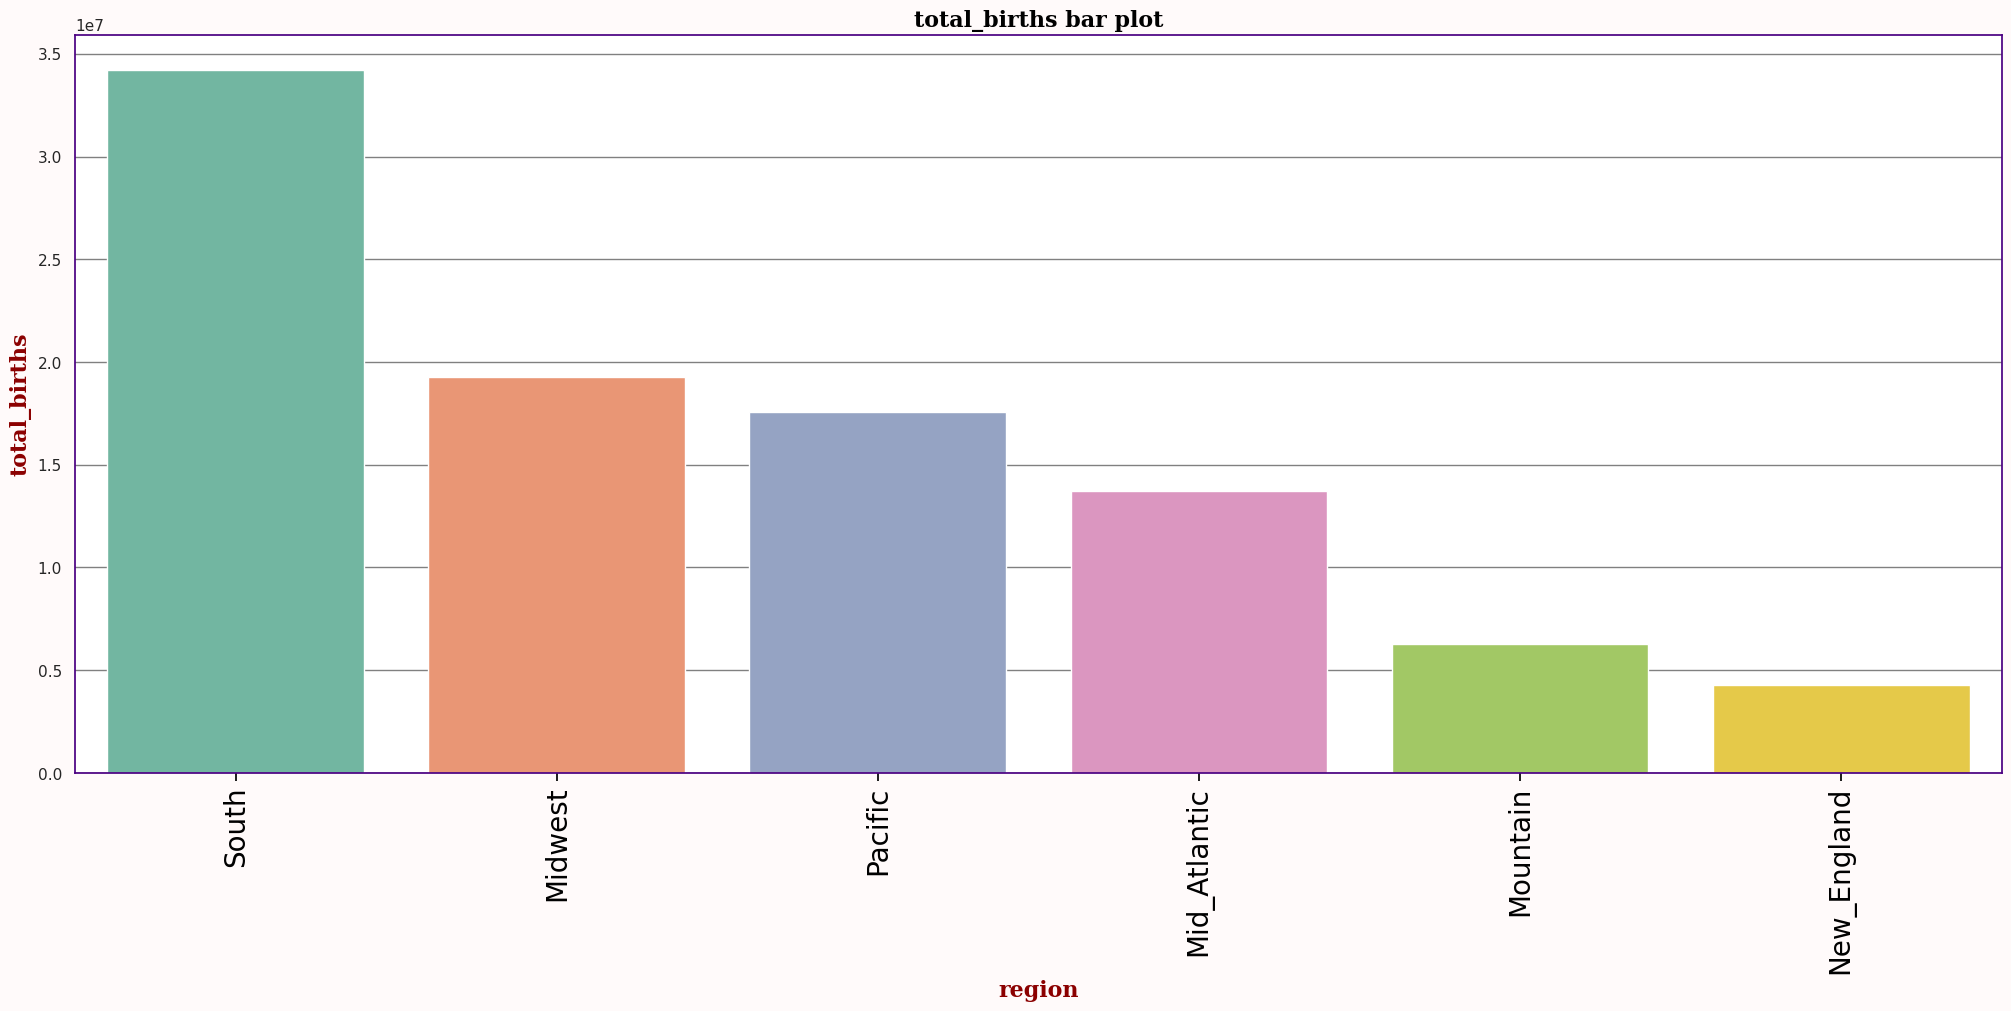

In [ ]:
ordering = group_data.sort_values('total_births',ascending=False).region
plotting_bar(group_data,'region','total_births',ordering=ordering)

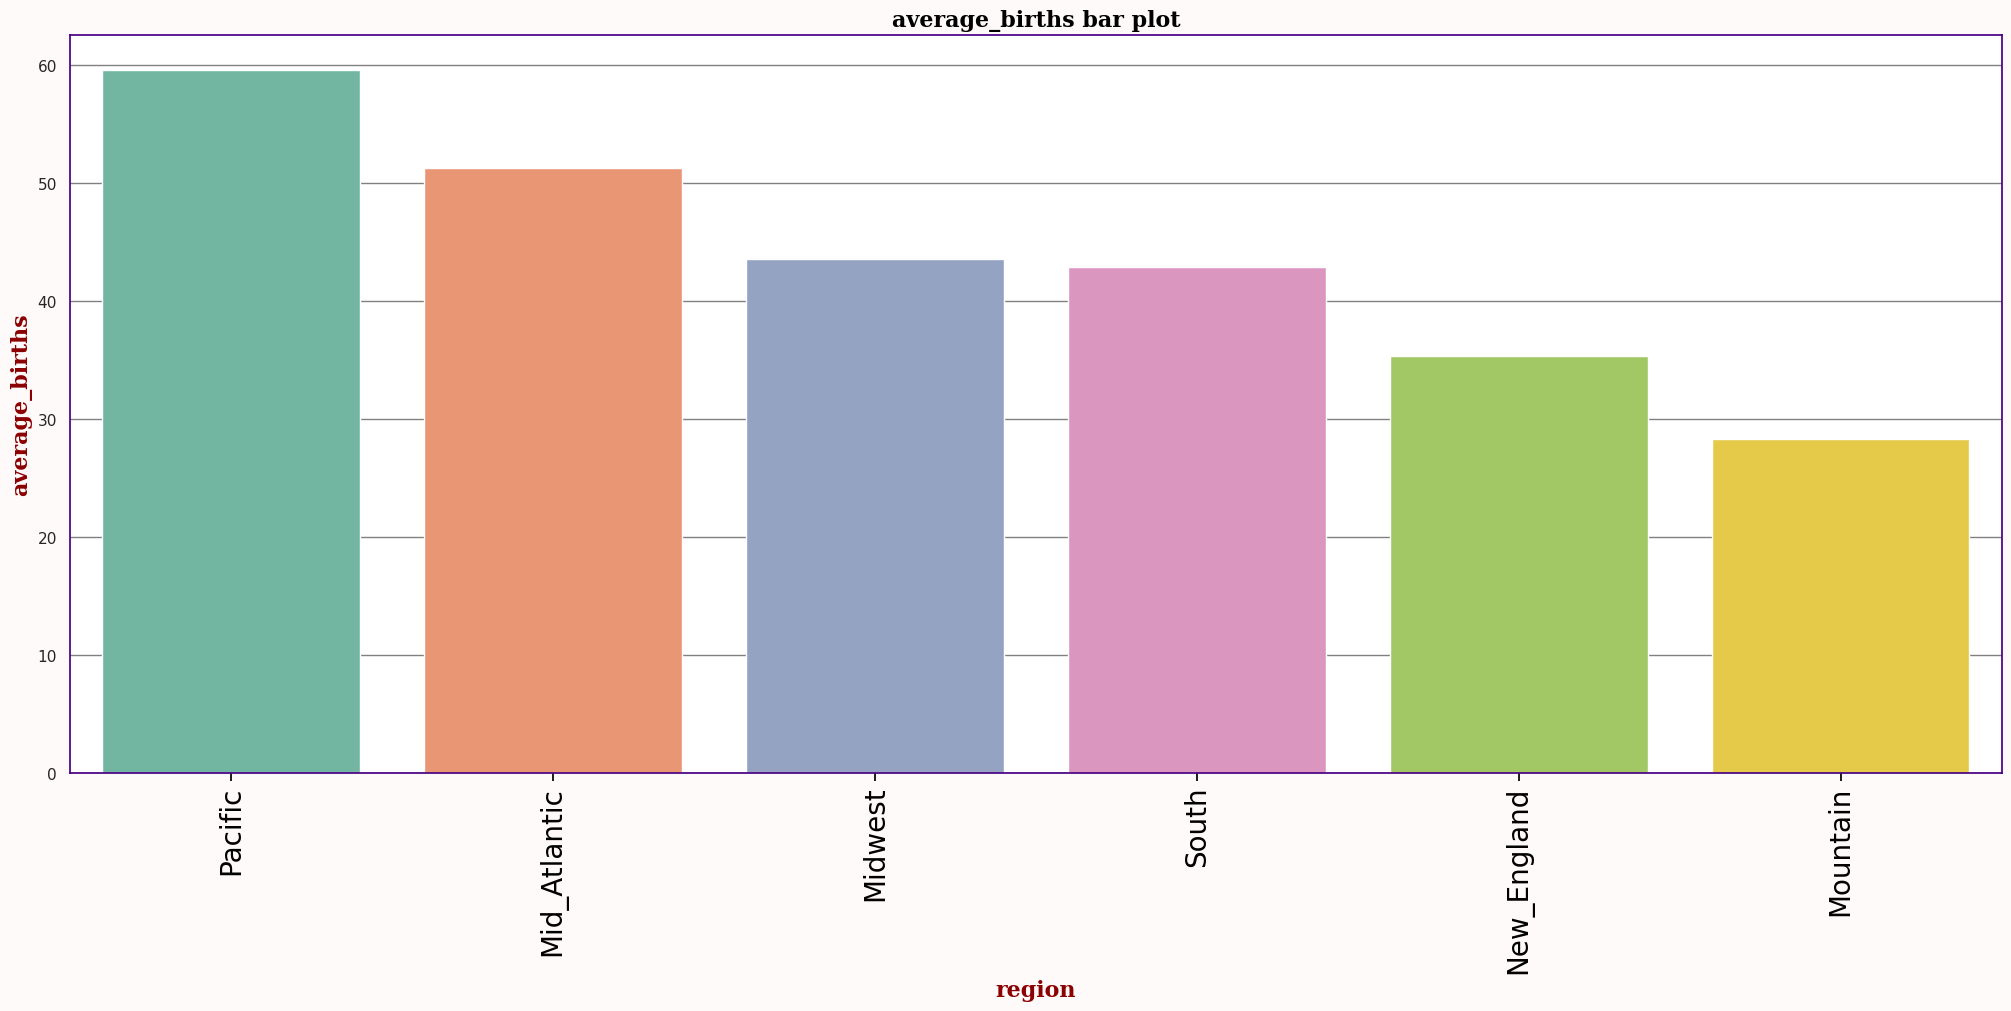

In [ ]:
ordering = group_data.sort_values('average_births',ascending=False).region
plotting_bar(group_data,'region','average_births',ordering=ordering)

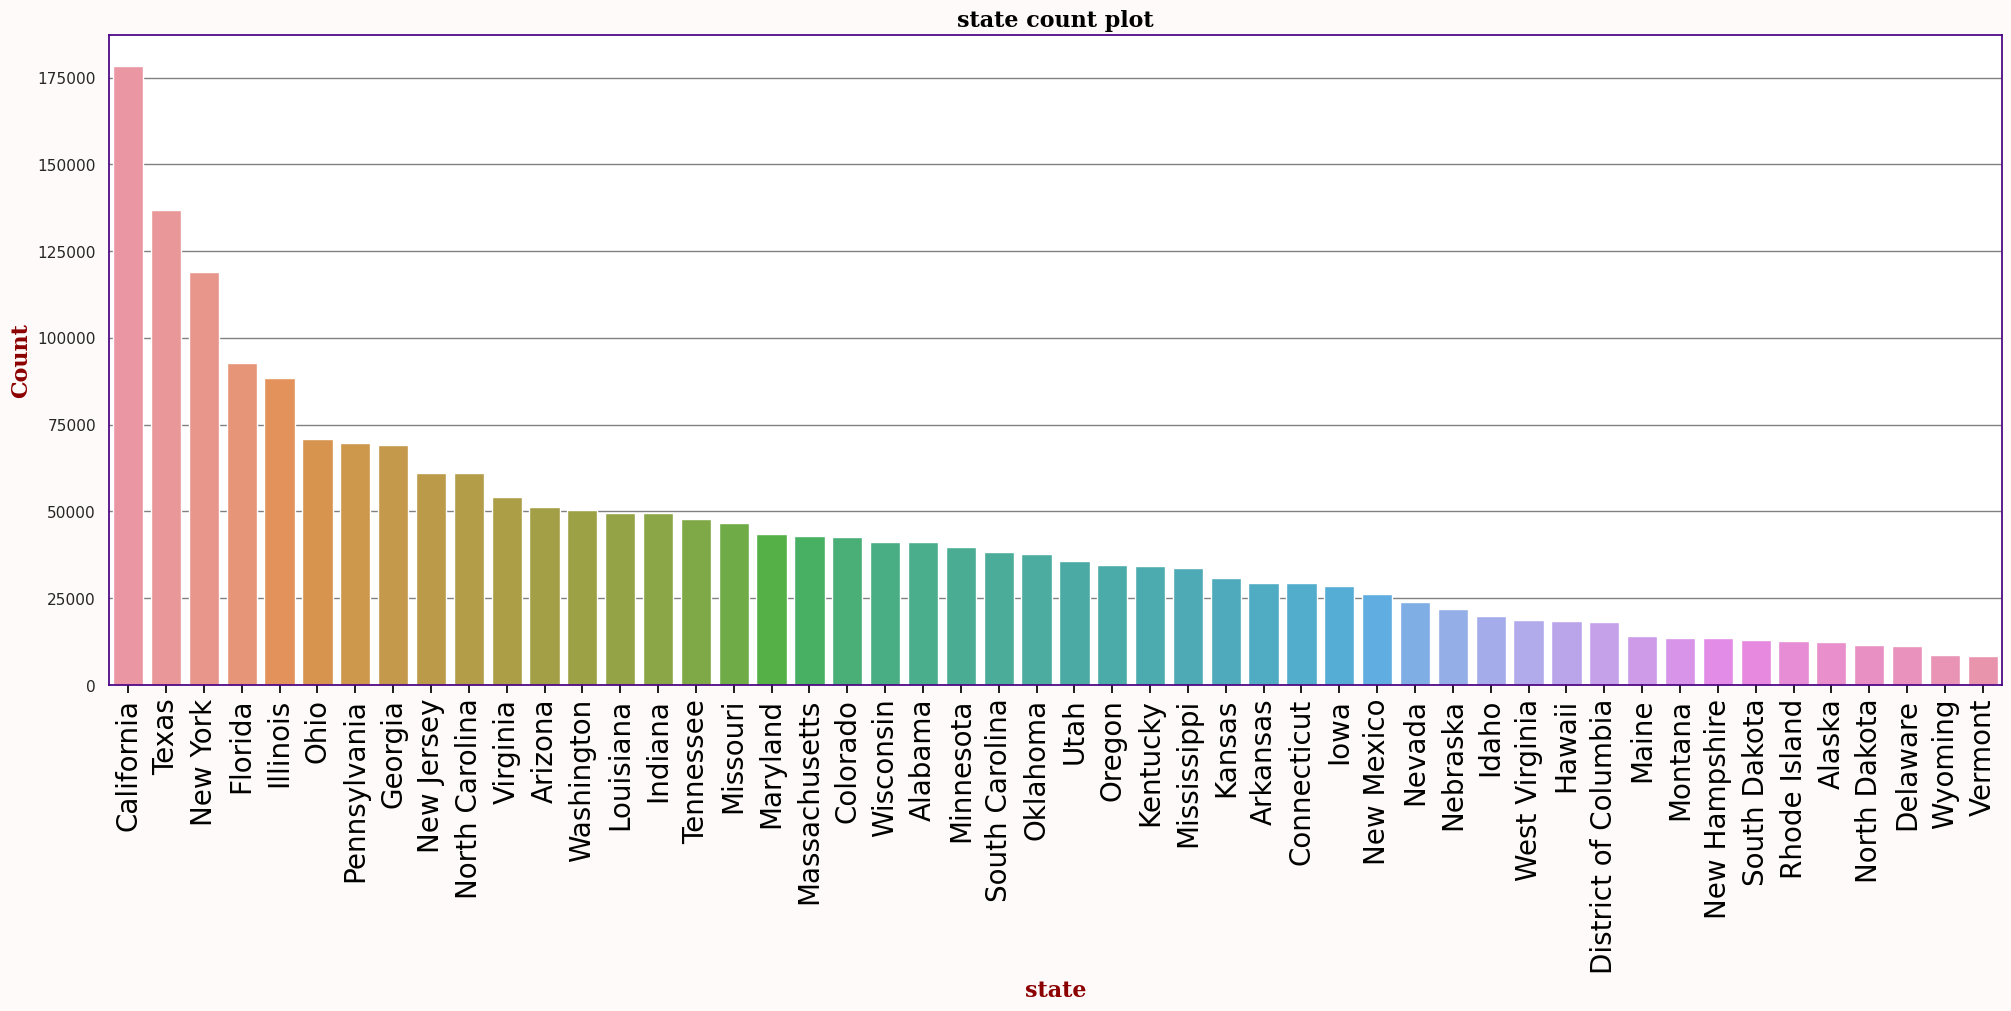

In [461]:
plotting_count(full_merged_eda,'state')

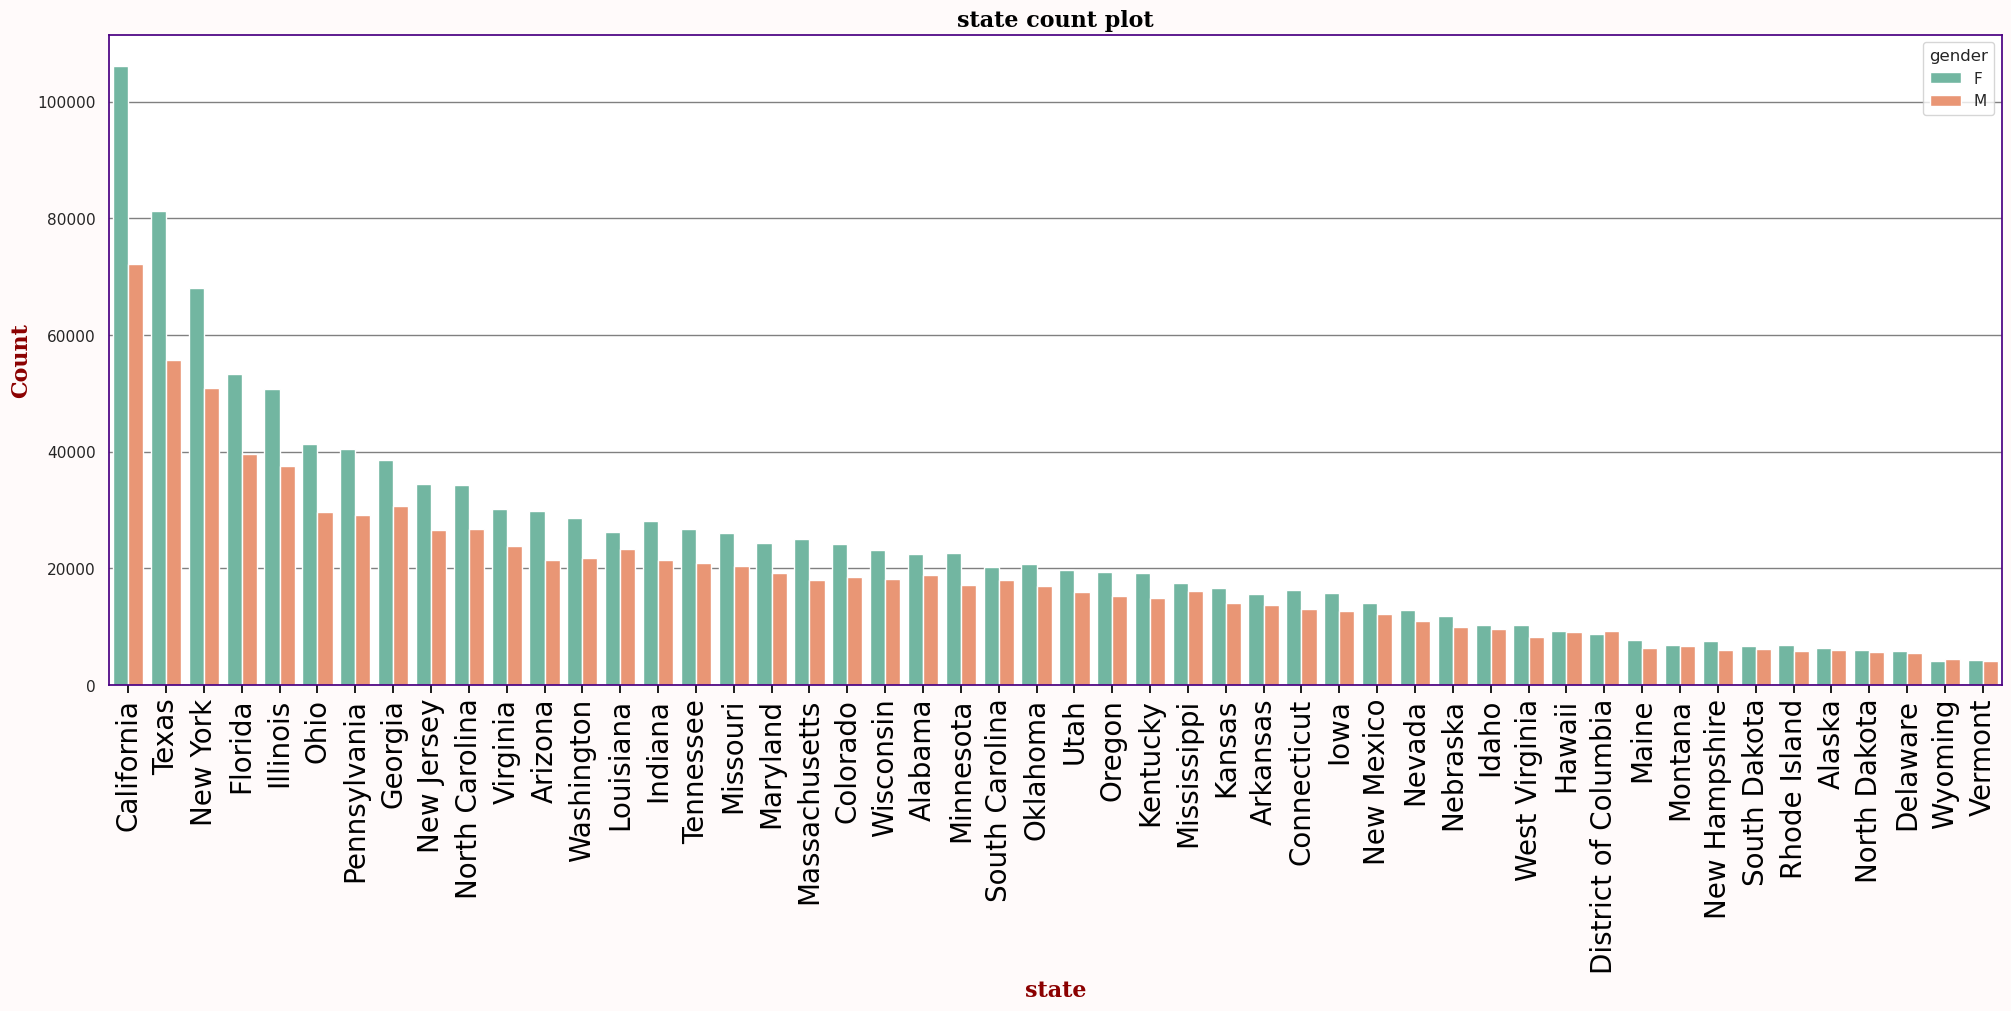

In [486]:
plotting_count(full_merged_eda,'state','gender')

In [463]:
group_data = summary_stats(full_merged_eda,'state','births')
# sorting by total
group_data.sort_values(by='total_births',ascending=False).tail()

,state,total_births,average_births,deviation_births,skewness_level_births
33,North Dakota,227572.0,19.725,24.305,3.642
7,Delaware,218194.0,19.443,23.572,3.252
1,Alaska,202898.0,16.371,18.619,3.515
44,Vermont,146074.0,17.475,18.528,2.928
49,Wyoming,128678.0,14.900,16.122,3.887


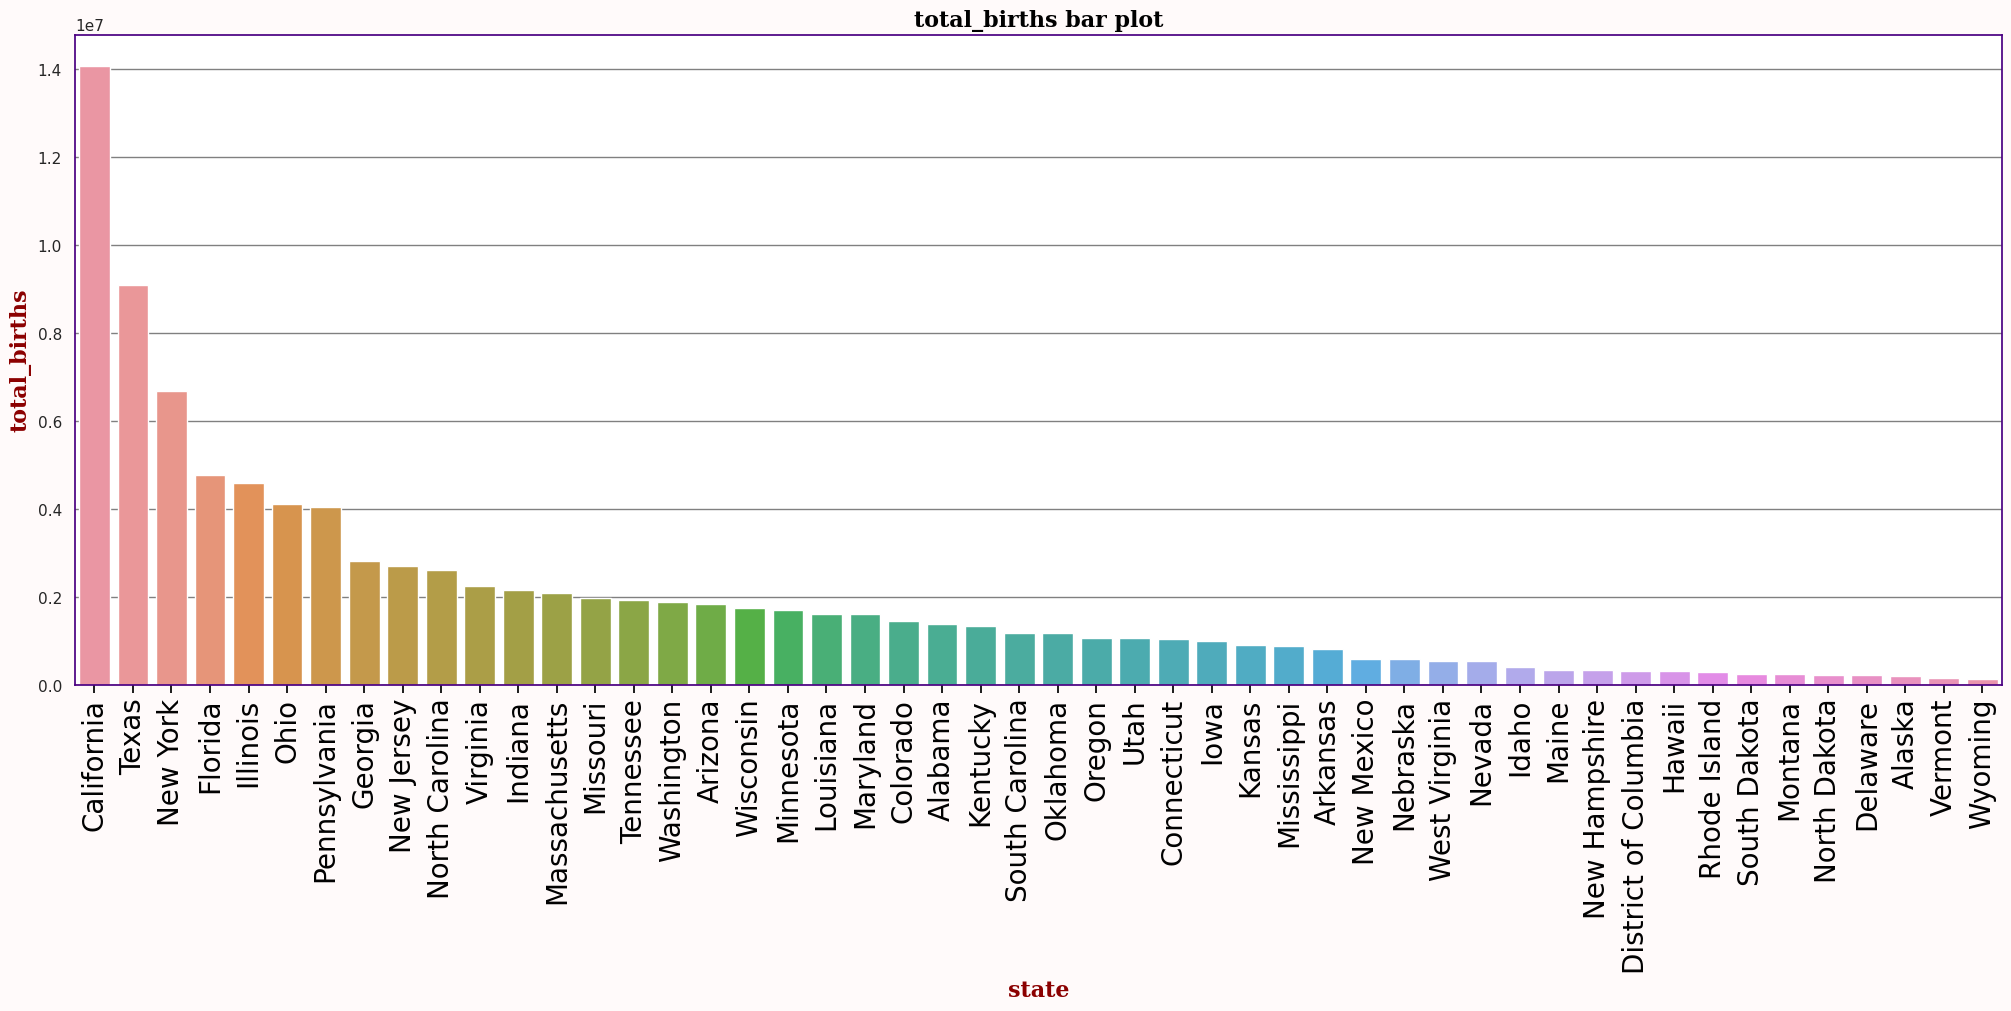

In [464]:
# how to order bar plots
# https://datavizpyr.com/sort-bars-in-barplot-using-seaborn-in-python/

ordering = group_data.sort_values('total_births',ascending=False).state
plotting_bar(group_data,'state','total_births',ordering=ordering)

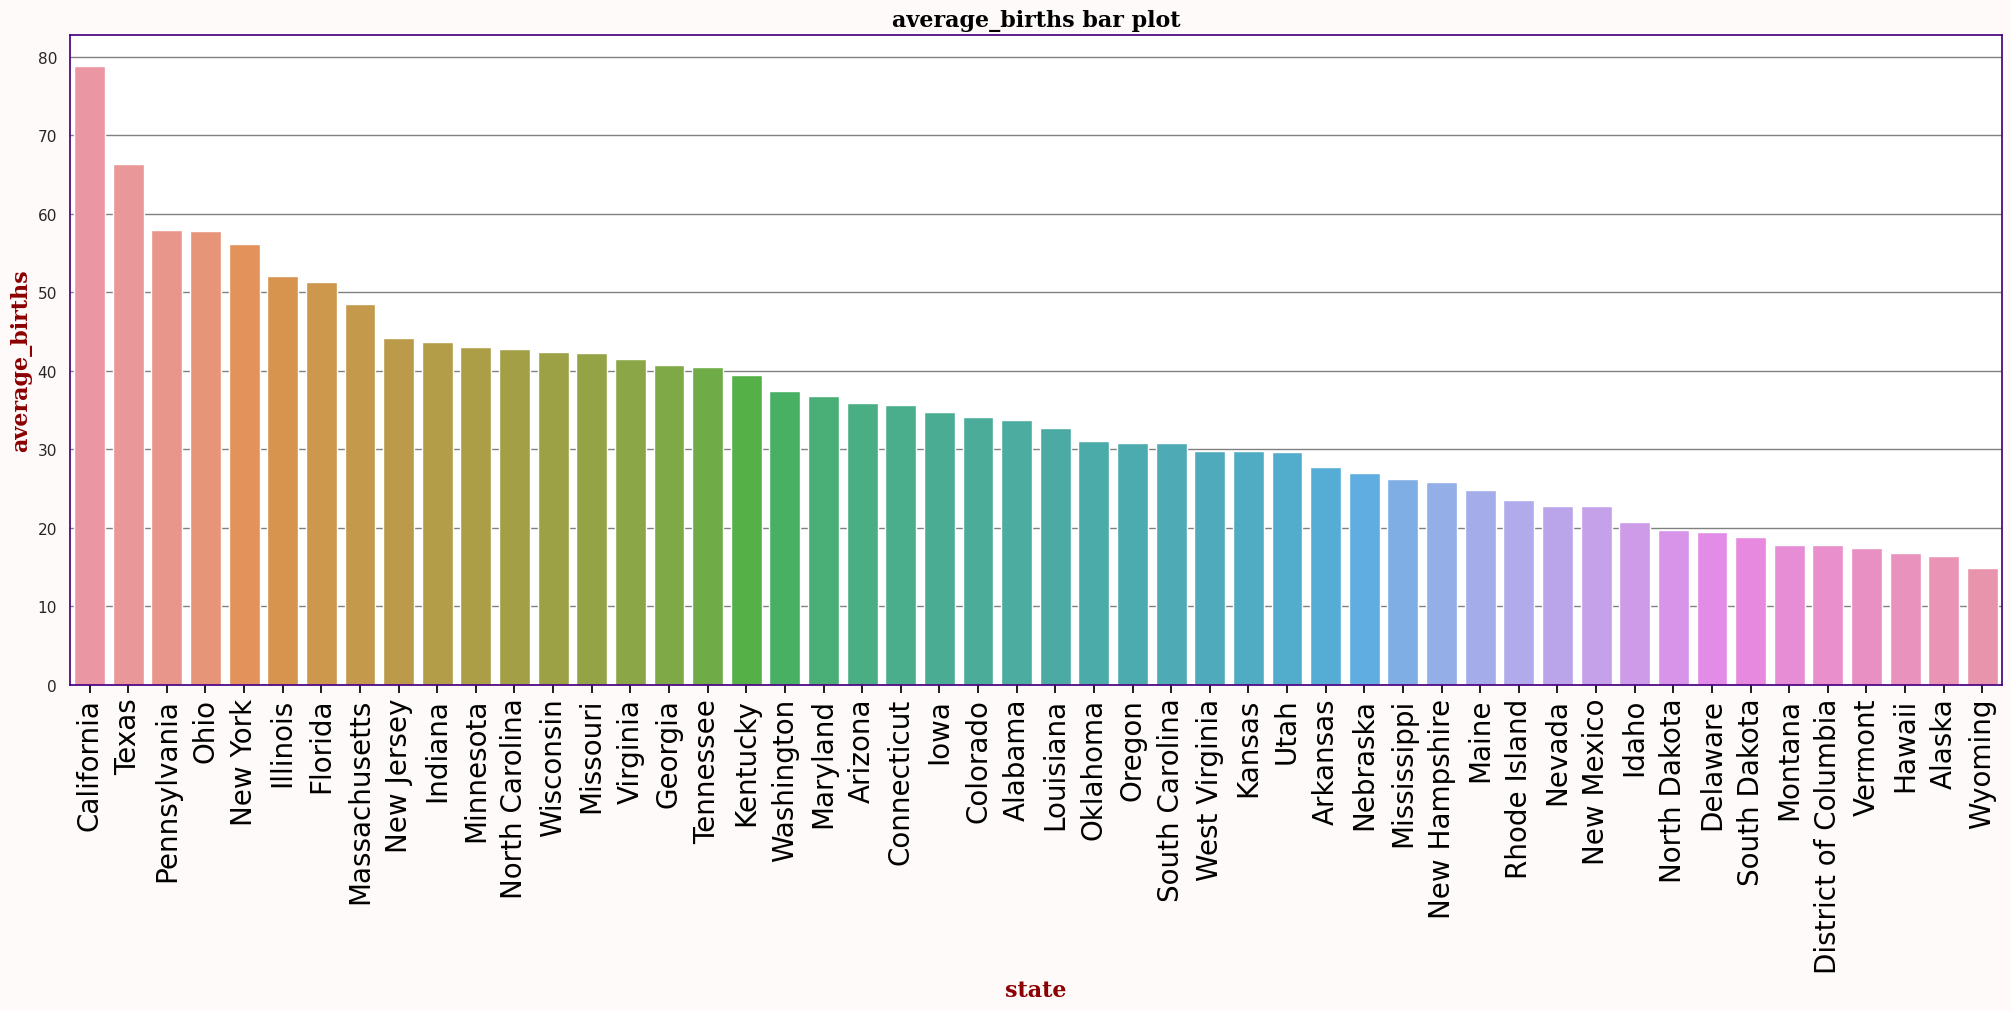

In [465]:
ordering = group_data.sort_values('average_births',ascending=False).state
plotting_bar(group_data,'state','average_births',ordering=ordering)

In [505]:
group_data = summary_stats(full_merged_eda,'name','name')
# sorting by total
group_data.sort_values(by='count_total_name',ascending=False).tail()

,name,count_total_name
12429,Lakyra,0
18784,Shawntez,0
17098,Reda,0
18785,Shawntia,0
525,Ajanee,0


In [506]:
group_data = (
    names_featured.groupby(["name"])['name'].agg(
        [
            (f"count_total_name",'count')
        ]
    ).reset_index()
)

group_data.sort_values('count_total_name',ascending=True).head()

,name,count_total_name
22239,Zyshonne,1
3479,Camrie,1
15869,Nikolay,1
15873,Nikoloz,1
6217,Eleftherios,1


In [507]:
print(group_data.shape)

# So there are names which are zero
names_featured.loc[names_featured.name == 'Lakyra',:]

(22240, 2)


,state,gender,year,name,births
1732675,MI,F,2003,Lakyra,5


In [512]:
group_data = (
    full_merged_eda.groupby(["name"])['name'].agg(
        [
            (f"count_total_name",'count')
        ]
    ).reset_index()
)

group_data.sort_values('count_total_name',ascending=True).head()

,name,count_total_name
525,Ajanee,0
4842,Danaja,0
16554,Prentis,0
12519,Lanyah,0
1243,Amyrah,0


In [509]:
full_merged_eda.shape

# So there are names which are zero ?
full_merged_eda.loc[full_merged_eda.name == 'Lakyra',:]

,name,gender,year,births,state,region


In [514]:
# plotting_count(full_merged_eda,'name') # too many values

# plotting_bar(group_data,'name','count_total_name') # Still too mnay values

Due to the data being much a sample set of 5000 with a condition of births < 500 would be taken at random for the analysis of histograms

In [581]:
def plotting_hist(data:pd.DataFrame,x:str):
    try:
        cond = full_merged_eda.births < 100
        data = data.loc[cond,:]
        data = data.sample(5000,random_state=32)
        fig,ax = plt.subplots(1,figsize=(20,5),constrained_layout=True)
        sns.set_theme(style='whitegrid',rc=rc,palette='Set2')
        sns.histplot(data=data,x=x,kde=True)

        ax.set_title(f"{x} Histogram plot",fontdict=font_title)
        ax.set_xlabel(f"{x}",fontdict=font_label)
        
        ax.tick_params(axis='x', rotation=90,labelsize=20)
    except KeyError:
        print(f"The wrong Key was passed\nPlease look are the information below\n")
        data.info(memory_usage='deep')

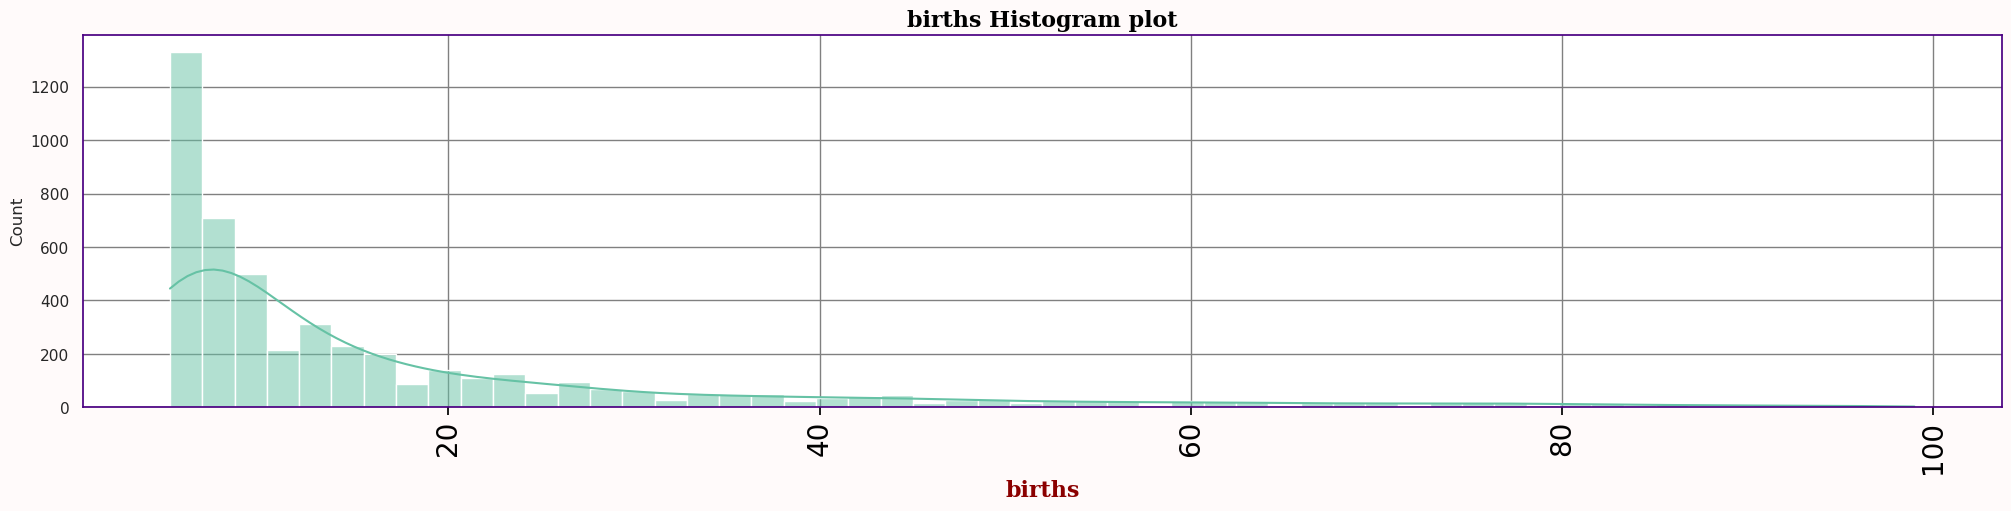

In [582]:
plotting_hist(full_merged_eda,'births')

In [603]:
def plotting_box(data:pd.DataFrame,x:str):
    try:
        # data = data.sample(5000,random_state=32)
        fig,ax = plt.subplots(1,figsize=(20,5),constrained_layout=True)
        sns.set_theme(style='whitegrid',rc=rc,palette='Set2')
        sns.boxplot(data=data,x=x)

        ax.set_title(f"Box plot",fontdict=font_title)
        ax.set_xlabel(f"{x}",fontdict=font_label)
        ax.tick_params(axis='x', rotation=90,labelsize=20)
        
    except KeyError:
        print(f"The wrong Key was passed\nPlease look are the information below\n")
        data.info(memory_usage='deep')

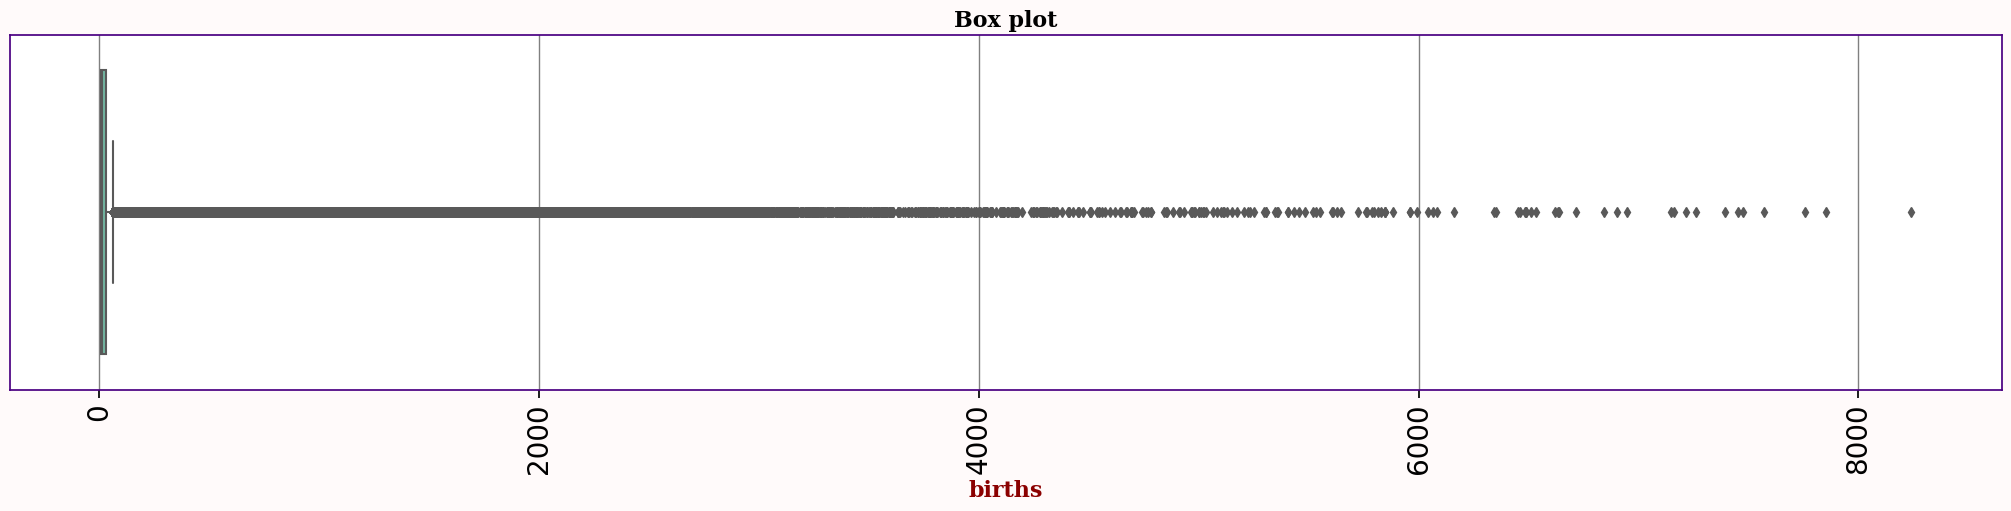

In [604]:
plotting_box(data=full_merged_eda,x='births')

In [605]:
cond = full_merged_eda.births > 8000
full_merged_eda.loc[cond,:]

,name,gender,year,births,state,region
219922,Michael,M,1990,8240,California,Pacific


### **Observations**

- California is highest in terms of total births and average births.
- California has the highest deviation i.e, it has a large spread in data points.
- Year 1990 has the highest sum total births
- Year 1983 has the highest mean births
- Year 1985 has the highest deviation
- Jordan is the highest reoccurring name count
- Females are the highest gender
- California females have the highest count
- The region named South is the most reoccuring region
- South region is the highest in terms of total births
- Pacific region has the highest mean births 
- Pacific region has the highest deviation in births 
- South region is the highest gender count
- Females have the highest count in South
- Year 2007, in the South region has the highest summation of births
- Year 1990, in the Pacific region has the highest mean births
- Year 1990, in the Pacific region has the highest deviation in births
- Females and Males have the highest count in the South region
- Year 2008 has the highest count
- Males have the highest average, total and deviation births
- Babies named Michael have the highest births and is in the state of California and the Pacific region

### **Conculsion**

Export for further and easier visualisation on PowerBi

In [632]:
names_featured.to_csv("../data/names_featured.csv",index=False)
regions_featured.to_csv("../data/regions_featured.csv",index=False)